<h2>1. BUSINESS PROBLEM</h2>

<h3>DESCRIPTION</h3>

Before asking someone on a date or skydiving, it's important to know your likelihood of success. The same goes for quoting home insurance prices to a potential customer. Homesite, a leading provider of homeowners insurance, does not currently have a dynamic conversion rate model that can give them confidence a quoted price will lead to a purchase. 

Using an anonymized database of information on customer and sales activity, including property and coverage information, Homesite is challenging you to predict which customers will purchase a given quote. Accurately predicting conversion would help Homesite better understand the impact of proposed pricing changes and maintain an ideal portfolio of customer segments. 

<h3>PROBLEM STATEMENT</h3>


1.	Every organization that we come across in our day-to-day life works on a limited resources and each of the processes that are carried out in an organization consumes resources and for the long-term survival organization it is important that these processes that are carried out in an organization are carried out in the most efficient way possible.
2.	Homesite is looking out for optimizing one such process of quoting home insurance prices to potential customers where they want to build a model which can achieve the best possible conversion rate for them.
3.	For this task they have provided us with a dataset which represents the activity of large number of customers who are interested in buying policies from there website. The provided features for each of these activities are anonymized and provide a rich representation of perspective customer and policy.
4. So, our task as a ML Engineer is that given a set of features we have to predict whether the quote given by Homesite to a customer will end up in a successful conversion or not.

<h3>BUSINESS OBJECTIVES & CONSTRAINTS</h3>

1. If the company is working with less resources then the cost of misclassification can be high because if the model goes on to predict a quote as a successful conversion when it is not then a lot of company resources will be wasted working on something that will not reap any benifits for the company.
2. What is the probability of successful conversion is required so that any threshold of choice can be taken based on the requirement. Meaning if the company wants more and more conversions and does not care much about unsuccessful converions being marked as successful one then they can go on to reduce the threshold for predicting a quote as successful but if working on limited resources then they cannot afford a missclassification in that case increase the threshold to include only those quotes as successful for which the model is very sure that it will end up being a successful conversion.
3. No strict latency requirement is there for the given problem.
4. High interepretibilty of the model is desired as it would help the management understand what all factors have influenced the model to decide a successful or unsuccessful conversion.

<h2>2. MAPPING BUSINESS PROBLEM TO A ML PROBLEM</h2>

<h3>DATA OVERVIEW</h3>

1. Data for solving the problem is there in a 207 MB file train.csv which has 260753 quotes with each datapoint having 299 columns out of which majority of features are anonymized.
2. Features include specific coverage information, sales information, personal information, property information, and geographic information.

<h3>TYPE OF ML PROBLEM</h3>

Its a BINARY CLASSIFICATION problem where the task is to predict QuoteConversion_Flag for each QuoteNumber in the test set.

<h3>PERFORMANCE METRICS</h3>

1. LOG LOSS - Because it is a binary classification task and we are working with probability scores and this is a useful metric in such scenarios.
2. BINARY CONFUSION MATRIX - Gives us an insight into how our model is performing with various classes.
3. ROC Curve - Provides us with a value to compare performance amongst various models and helps in making a choice of right threshold by providing us with a best tradeoff possible between FPR & TPR
4. F1_Score - Since the nature of the dataset is such that there exists a natural imbalance in the dataset and we are more concerned about how well our model performs on successful conversions so in such scenarios F1_Score becomes a important metric.(Similar scenarios exists in Fraud Detection , Cancer Detection etc.)

<h3>TRAIN & CV SET CONSTRUCTION</h3>

Since the features being used are broadly of a NON-TEMPORAL nature. So, for such problem statements RANDOM SPLITTING is the stratergy we should opt for.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import seaborn as sns
import scikitplot as skplt
import pickle
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

<h2>3. DATA ACQUISITION</h2>

In [2]:
data = pd.read_csv('homesite-quote-conversion/train.csv')
data.head() 

QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  Field7  \
0            1          2013-08-16                     0      B      23   
1            2          2014-04-22                     0      F       7   
2            4          2014-08-25                     0      F       7   
3            6          2013-04-15                     0      J      10   
4            8          2014-01-25                     0      E      23   

   Field8  Field9 Field10  Field11 Field12  CoverageField1A  CoverageField1B  \
0  0.9403  0.0006     965   1.0200       N               17               23   
1  1.0006  0.0040     548   1.2433       N                6                8   
2  1.0006  0.0040     548   1.2433       N                7               12   
3  0.9769  0.0004   1,165   1.2665       N                3                2   
4  0.9472  0.0006   1,487   1.3045       N                8               13   

   CoverageField2A  CoverageField2B  CoverageField3A  CoverageField3B  \
0               17               23               15               22   
1                6                8                5                7   
2                7               12                6               10   
3                3                2                2                2   
4                8               13                7               11   

   CoverageField4A  CoverageField4B  CoverageField5A  CoverageField5B  \
0               16               22               13               22   
1                5                8               13               22   
2                7               11               25               25   
3                3                2               13               22   
4                7               13               13               22   

   CoverageField6A  CoverageField6B CoverageField8 CoverageField9  \
0               13               23              T              D   
1               13               23              T              E   
2               13               23              T              J   
3               13               23              Y              F   
4               13               23              T              F   

   CoverageField11A  CoverageField11B  SalesField1A  SalesField1B  \
0                 2                 1             7            18   
1                 5                 9             5            14   
2                 4                 6             3            10   
3                15                23             8            19   
4                 4                 6             3             6   

   SalesField2A  SalesField2B  SalesField3  SalesField4  SalesField5  \
0             3             8            0            5            5   
1             6            18            1            5            5   
2             4            11            1            5            5   
3            14            24            0            5            5   
4             3             6            1            5            5   

   SalesField6 SalesField7  SalesField8  SalesField9  SalesField10  \
0           24           V        48649            0             0   
1           11           P        26778            0             0   
2           11           K         8751            0             0   
3           23           V        43854            0             0   
4            7           R        12505            1             0   

   SalesField11  SalesField12  SalesField13  SalesField14  SalesField15  \
0             0             0             0             0             0   
1             1             1             0             0             0   
2             2             2             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   PersonalField1  PersonalField2  PersonalField4A  Person

<h2>4. EXPLORATORY DATA ANALYSIS</h2>

In [3]:
def extract_feature_dataset(feature,data):
    """
    This functions takes feature name as input and a dataset containing all
    the sub features realted to that particular feature
    """
    features = []
    for column in data.columns:
        if re.search('^'+feature+'\w+$',column) != None:
            features.append(column)
    return pd.DataFrame(data.loc[:,features + ['QuoteConversion_Flag']])

In [4]:
def get_numerical_features(dataset):
    """Returns a list of all the numerical features present in the dataset"""
    numerical_features = []
    for feature in dataset.columns:
        if dataset[feature].dtypes != 'O':
            numerical_features.append(feature)
    return numerical_features

In [5]:
def get_categorical_features(dataset):
    """Returns a list of all the categorical features present in the dataset"""
    categorical_features = []
    for feature in dataset.columns:
        if dataset[feature].dtypes == 'O':
            categorical_features.append(feature)
    return categorical_features

<h3>DISTIBUTION OF DATASET AMONG OUTPUT CLASSES (SUCCESSFUL AND NOT SUCCESSFUL QUOTE CONVERSIONS)</h3>

<AxesSubplot:xlabel='QuoteConversion_Flag'>

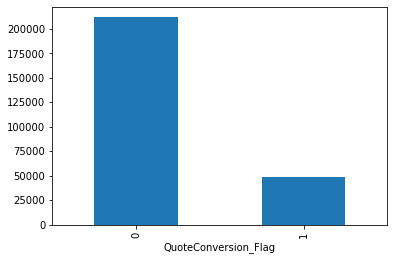

In [6]:
data.groupby('QuoteConversion_Flag')['QuoteConversion_Flag'].count().plot.bar()

In [7]:
print('Total number of quotes for which conversion was unsuccessful are', data.groupby('QuoteConversion_Flag')['QuoteConversion_Flag'].count()[0]/data['QuoteConversion_Flag'].count() * 100)
print('Total number of quotes for which conversion was successful are', data.groupby('QuoteConversion_Flag')['QuoteConversion_Flag'].count()[1]/data['QuoteConversion_Flag'].count() * 100)

Total number of quotes for which conversion was unsuccessful are 81.24892139304247
Total number of quotes for which conversion was successful are 18.75107860695754


<strong>OBSERVATION:</strong> The given dataset is a IMBALANCED DATASET.

<h3>MISSING VALUES</h3>

In [8]:
def identify_features_na(data):
    """This function takes a dataset as input and return a list of 
    columns for which contain a null value"""
    features_with_na = []
    for column in data.columns:
        if data[column].isnull().sum() > 1:
            features_with_na.append(column)
    return features_with_na           

In [9]:
for feature in identify_features_na(data):
    print(feature, np.round(data[feature].isnull().mean(),5)* 100, '% missing values')

PersonalField7 0.043 % missing values
PersonalField84 47.634 % missing values
PropertyField3 0.031 % missing values
PropertyField4 0.024 % missing values
PropertyField29 76.964 % missing values
PropertyField32 0.027 % missing values
PropertyField34 0.027 % missing values
PropertyField36 0.043 % missing values
PropertyField38 0.468 % missing values


Since only two features PersonalField84 & PropertyField29 have significant amount of null values will explore if the presence of null value in both these features is providing us with any meaningful information. For the rest of the features since the number of values that are null are extremely low in number so would avoid making any conclusions out of it.

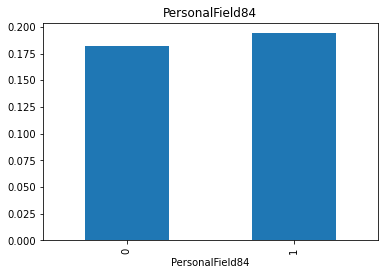

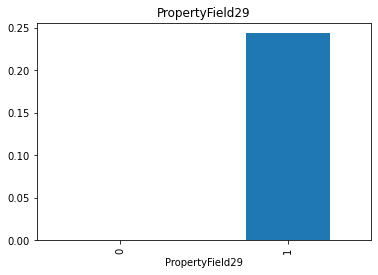

In [10]:
for feature in ['PersonalField84', 'PropertyField29']:
    d = data.copy()
    d[feature] = np.where(data[feature].isnull(),1,0)
    d.groupby(feature)['QuoteConversion_Flag'].mean().plot.bar()
    plt.title(feature)
    plt.show()

<strong>OBSERVATIONS:</strong>

1. If PropertyField29 is NOT NULL then the chance of successful conversion is extremely low. so we can say that presence of a NULL value for this feature provides some meaningful information which is helping decide successful and not successful conversions.
2. Whereas PersonalField84 has equal proportion (Approximately 17.5% of transactions as successful and rest as unsucessful) of successful and not successful conversions in both the cases where its value is NULL and where it is NOT NULL.So, presence of NULL value in this case does not seem to provide any additional information

<strong>HANDLING MISSING VALUES FOR CATEGORICAL FEATURES</strong>

In [11]:
features_categorical = get_categorical_features(data.loc[:,identify_features_na(data)])
features_categorical 

['PersonalField7',
 'PropertyField3',
 'PropertyField4',
 'PropertyField32',
 'PropertyField34',
 'PropertyField36',
 'PropertyField38']

In [12]:
def replace_categorical_feature_na(data, categorical_feature_nan):
    dataset = data.copy()
    dataset[categorical_feature_nan] = dataset[categorical_feature_nan].fillna('Missing')
    return dataset

In [13]:
data = replace_categorical_feature_na(data, features_categorical)
data[features_categorical].isnull().sum()

PersonalField7     0
PropertyField3     0
PropertyField4     0
PropertyField32    0
PropertyField34    0
PropertyField36    0
PropertyField38    0
dtype: int64

<strong>HANDLING MISSING VALUES FOR NUMERICAL FEATURES</strong>

In [14]:
features_numerical = get_numerical_features(data.loc[:,identify_features_na(data)])
features_numerical

['PersonalField84', 'PropertyField29']

In [15]:
data[['PersonalField84_nan', 'PropertyField29_nan']] = np.where(data[features_numerical].isnull(),1,0)

In [16]:
data[features_numerical] = data[features_numerical].fillna(100)

<h3>ANALYSING FEILD, COVERAGE, SALES, PERSONAL, PROPERTY & GEOGRAPHIC FEATURES</h3>

<strong>FIELD FEATURES</strong>

In [17]:
dataset = extract_feature_dataset('Field',data)

In [18]:
for feature in dataset.columns:
    if feature != 'QuoteConversion_Flag':
        print('{} has {} unique values'.format(feature,len(dataset[feature].unique())))

Field6 has 8 unique values
Field7 has 28 unique values
Field8 has 38 unique values
Field9 has 5 unique values
Field10 has 8 unique values
Field11 has 11 unique values
Field12 has 2 unique values


In [19]:
numerical_features = get_numerical_features(dataset)
categorical_features = get_categorical_features(dataset)

In [20]:
print('Numerical Features : ', numerical_features)
print('Categorical Features : ', categorical_features)

Numerical Features :  ['Field7', 'Field8', 'Field9', 'Field11', 'QuoteConversion_Flag']
Categorical Features :  ['Field6', 'Field10', 'Field12']


<strong>DISCRETE NUMERICAL FEATURES</strong>

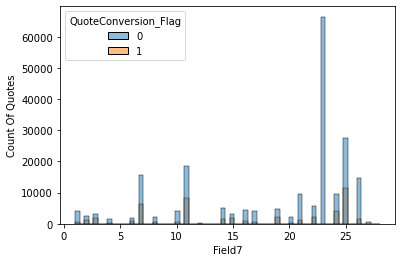

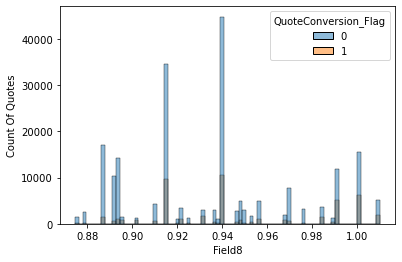

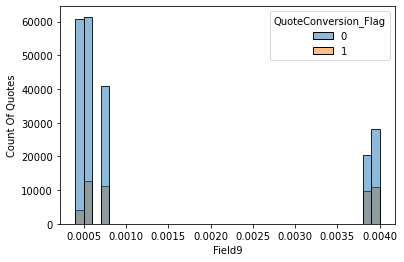

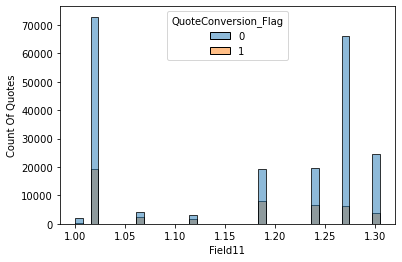

In [21]:
for feature in get_numerical_features(dataset):
    if feature != 'QuoteConversion_Flag' and len(dataset[feature].unique()) < 40:
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>CATEGORICAL FEATURES</strong>

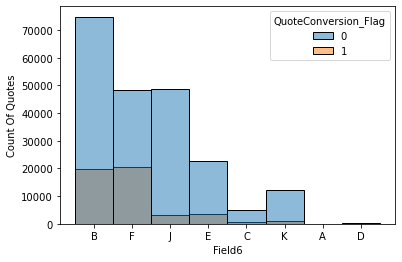

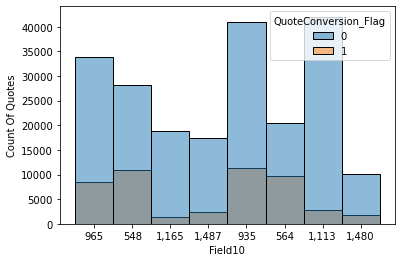

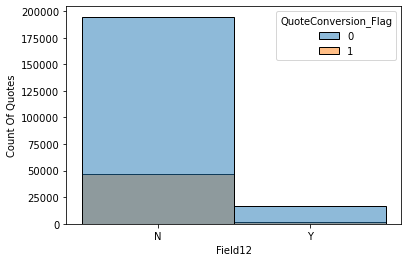

In [22]:
for feature in get_categorical_features(dataset):
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>OBSERVATIONS:</strong>

1. DISCRETE NUMERICAL FEATURES
    
    A. The dicrete feature distributions does not seem to be following any standard distibutions. But what can be obsereved is that for certian discrete values proportion of successful conversion out of total quotes made having that discrete value is high and in some cases there seems to be no or negligible conversion ratio which can be a useful information. Like for example we can say that the chance of a quote getting converted into a successful one is high when we have a higher value of Field9 in our quote.


2. CATEGORICAL NUMERICAL FEATURES

    A. Field6 taking a value B or F dractically increases its chance of being a successful conversion.
    
    B. Filed10 there seems to be a realtionship b/w magnitude of the value that feature takes and its chance of being a successful conversion. The smaller the value the higher the chance.
    
    C. Field12 assuming a value Y drastically reduces the chance of quote being a successful conversion.

<strong>COVERAGE FIELD</strong>

In [23]:
dataset = extract_feature_dataset('CoverageField',data)

In [24]:
for feature in dataset.columns:
    if feature != 'QuoteConversion_Flag':
        print('{} has {} unique values'.format(feature,len(dataset[feature].unique())))

CoverageField1A has 26 unique values
CoverageField1B has 26 unique values
CoverageField2A has 25 unique values
CoverageField2B has 25 unique values
CoverageField3A has 25 unique values
CoverageField3B has 25 unique values
CoverageField4A has 25 unique values
CoverageField4B has 25 unique values
CoverageField5A has 3 unique values
CoverageField5B has 4 unique values
CoverageField6A has 3 unique values
CoverageField6B has 4 unique values
CoverageField8 has 7 unique values
CoverageField9 has 12 unique values
CoverageField11A has 26 unique values
CoverageField11B has 26 unique values


In [25]:
numerical_features = get_numerical_features(dataset)
categorical_features = get_categorical_features(dataset)

In [26]:
print('Numerical Features : ', numerical_features)
print('Categorical Features : ', categorical_features)

Numerical Features :  ['CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField11A', 'CoverageField11B', 'QuoteConversion_Flag']
Categorical Features :  ['CoverageField8', 'CoverageField9']


<strong>DISCRETE NUMERICAL FEATURES</strong>

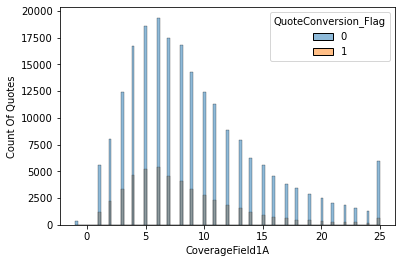

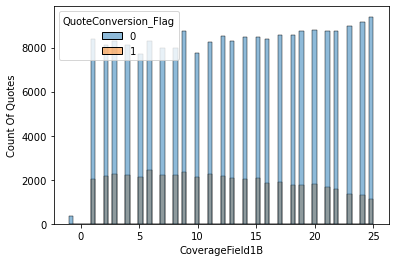

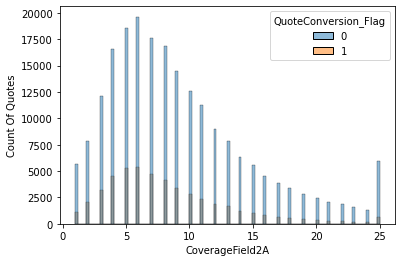

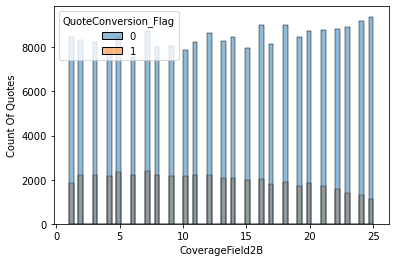

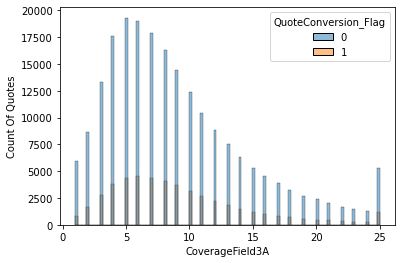

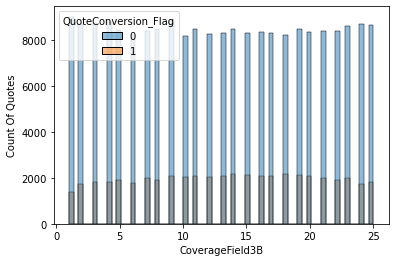

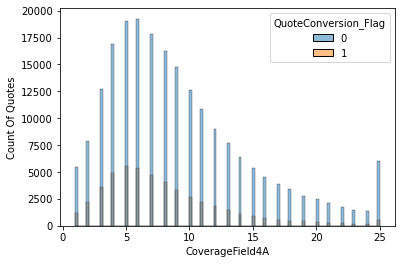

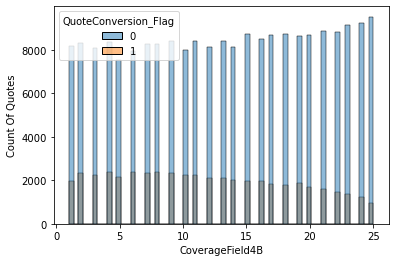

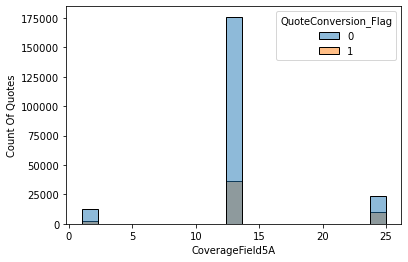

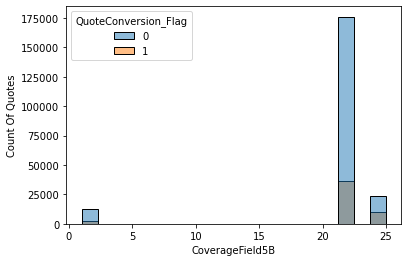

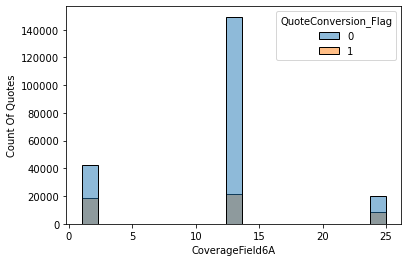

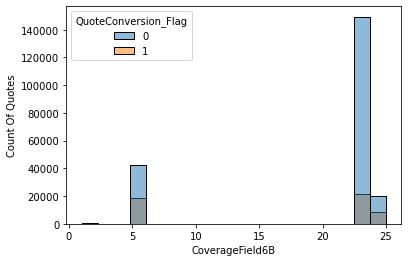

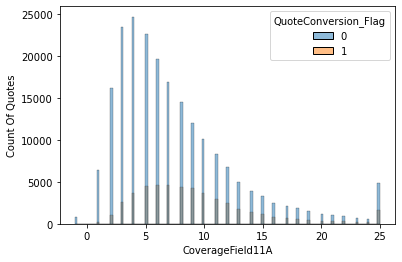

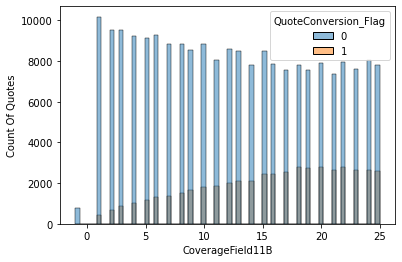

In [27]:
for feature in get_numerical_features(dataset):
    if feature != 'QuoteConversion_Flag' and len(dataset[feature].unique()) < 30:
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>CATEGORICAL FEATURES</strong>

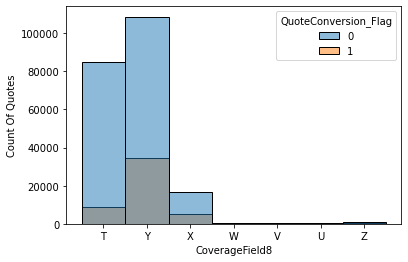

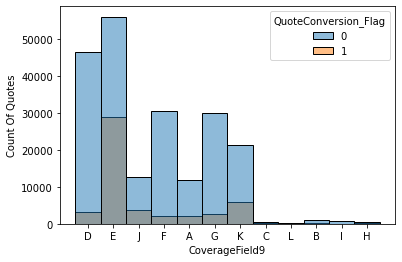

In [28]:
for feature in get_categorical_features(dataset):
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>OBSERVATIONS:</strong>

1. DISCRETE NUMERICAL FEATURES
    
    A. CoverageField 1A,2A,3A,4A,11A seems to be having a log normal like distribution with the distribution being right skewed.
    
    B. Chance of a Quote being converted successfully reduces with increase in value of CoverageField 1B,2B,4B.
    
    C. Chance of a Quote being converted successfully increases with increase in value of CoverageField 11B.
    
    
2. CATEGORICAL NUMERICAL FEATURES

    A. Quote having a value of  T, X and Y for CoverageField8 has more chance of being a successful conversion.For any other values the chances of it being successful conversion is extremely low. 
    
    B. CoverageField9 seems to have a similar behaviour where the chances of successful conversion is high for only certain values and low for the rest.

<strong>SALES FEATURES</strong>

In [29]:
dataset = extract_feature_dataset('SalesField',data)

In [30]:
for feature in dataset.columns:
    if feature != 'QuoteConversion_Flag':
        print('{} has {} unique values'.format(feature,len(dataset[feature].unique())))

SalesField1A has 25 unique values
SalesField1B has 25 unique values
SalesField2A has 26 unique values
SalesField2B has 26 unique values
SalesField3 has 2 unique values
SalesField4 has 5 unique values
SalesField5 has 5 unique values
SalesField6 has 24 unique values
SalesField7 has 7 unique values
SalesField8 has 61530 unique values
SalesField9 has 2 unique values
SalesField10 has 19 unique values
SalesField11 has 20 unique values
SalesField12 has 22 unique values
SalesField13 has 8 unique values
SalesField14 has 12 unique values
SalesField15 has 12 unique values


In [31]:
numerical_features = get_numerical_features(dataset)
categorical_features = get_categorical_features(dataset)

In [32]:
print('Numerical Features : ', numerical_features)
print('Categorical Features : ', categorical_features)

Numerical Features :  ['SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6', 'SalesField8', 'SalesField9', 'SalesField10', 'SalesField11', 'SalesField12', 'SalesField13', 'SalesField14', 'SalesField15', 'QuoteConversion_Flag']
Categorical Features :  ['SalesField7']


<strong>DISCRETE NUMERICAL FEATURES</strong>

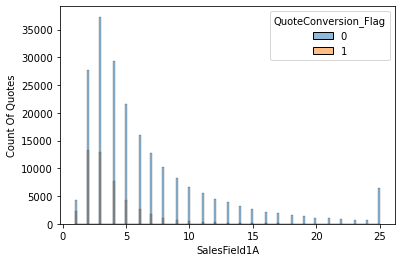

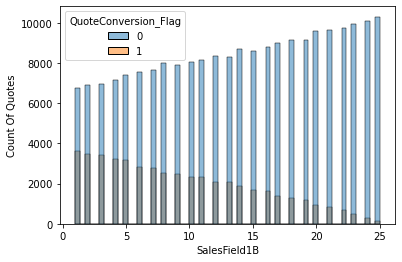

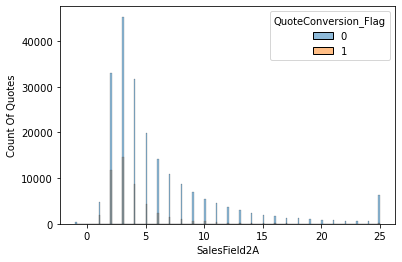

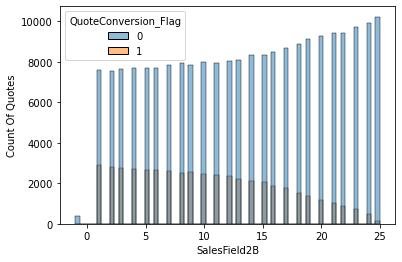

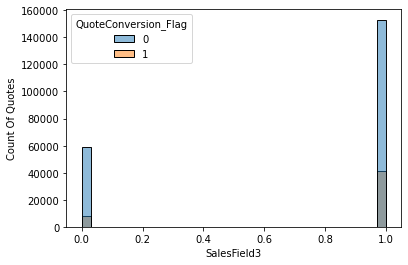

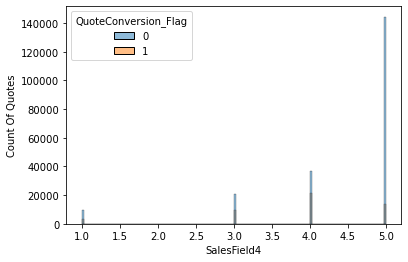

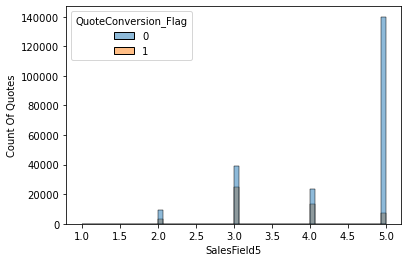

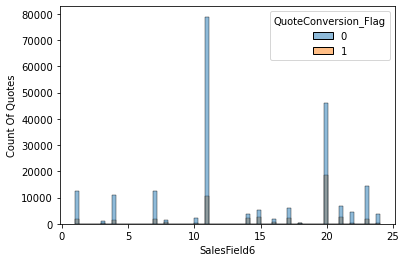

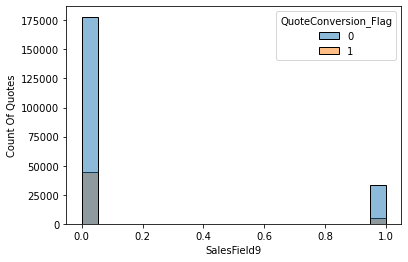

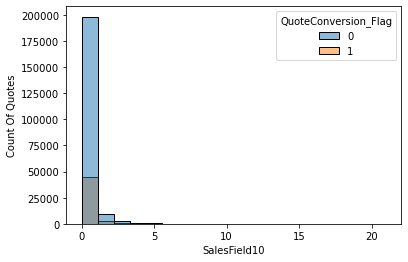

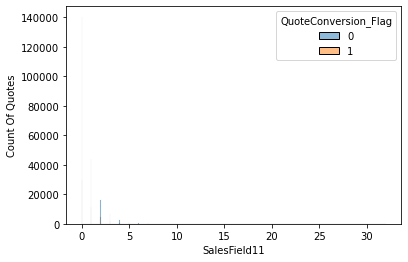

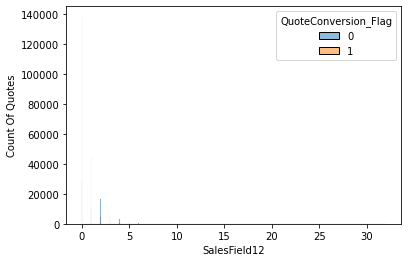

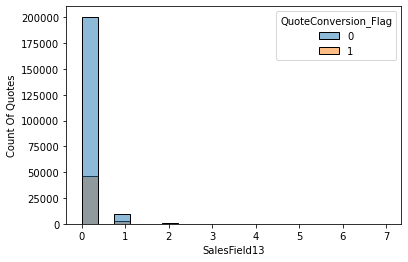

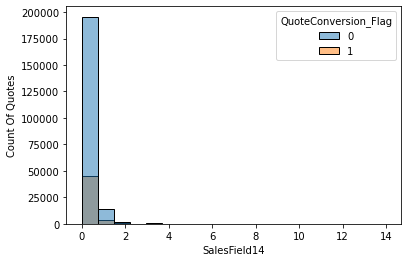

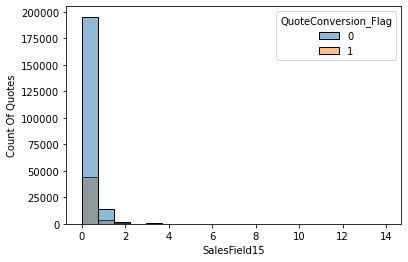

In [33]:
for feature in get_numerical_features(dataset):
    if feature != 'QuoteConversion_Flag' and len(dataset[feature].unique()) < 30:
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>CONTINOUS NUMERICAL FEATURES</strong>

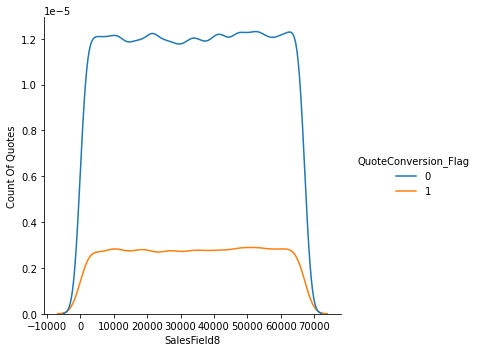

In [34]:
sns.displot(data=dataset, x="SalesField8", hue="QuoteConversion_Flag", kind = 'kde')
plt.xlabel('SalesField8')
plt.ylabel('Count Of Quotes')
plt.show()

<strong>CATEGORICAL FEATURES</strong>

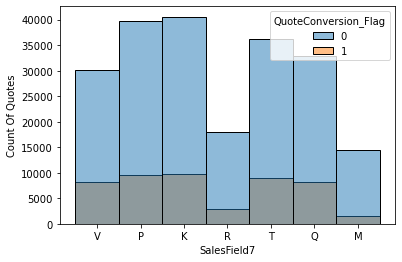

In [35]:
for feature in get_categorical_features(dataset):
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>OBSERVATIONS:</strong>

1. DISCRETE NUMERICAL FEATURES

    A. SalesField 1A,2A seems to be having a log normal like distribution with the distribution being right skewed.
    
    B. SalesField 1B,2B seems to be having a inverse relationship b/w the magnitude and the chance of a quote being a sucessful conversion.
    
    C. SalesFeild3 having a value of 1 increases the chance of quote being successfully converted.
    
    D. Mid Range values for SalesField4 and SalesField5 increases the chance of quote being successfully converted.
    
    E. SalesField9 having a value of 0 increases the chance of quote being successfully converted.
    
    F. SalesField10-15 have a extremely skewed distribution with chances of conversion drastically dropping with increase in their respective values.


2. CONTINOUS NUMERICAL FEATURES

    A. Count of quotes being successfully converted is uniformly distributed accross all the values of SalesField8.


<strong>PERSONAL FEATURES</strong>

In [36]:
dataset = extract_feature_dataset('PersonalField',data)

In [37]:
for feature in dataset.columns:
    if feature != 'QuoteConversion_Flag':
        print('{} has {} unique values'.format(feature,len(dataset[feature].unique())))

PersonalField1 has 2 unique values
PersonalField2 has 2 unique values
PersonalField4A has 26 unique values
PersonalField4B has 26 unique values
PersonalField5 has 9 unique values
PersonalField6 has 2 unique values
PersonalField7 has 3 unique values
PersonalField8 has 3 unique values
PersonalField9 has 3 unique values
PersonalField10A has 26 unique values
PersonalField10B has 26 unique values
PersonalField11 has 5 unique values
PersonalField12 has 5 unique values
PersonalField13 has 4 unique values
PersonalField14 has 30 unique values
PersonalField15 has 22 unique values
PersonalField16 has 50 unique values
PersonalField17 has 66 unique values
PersonalField18 has 61 unique values
PersonalField19 has 57 unique values
PersonalField22 has 7 unique values
PersonalField23 has 13 unique values
PersonalField24 has 14 unique values
PersonalField25 has 14 unique values
PersonalField26 has 14 unique values
PersonalField27 has 17 unique values
PersonalField28 has 7 unique values
PersonalField29 ha

In [38]:
numerical_features = get_numerical_features(dataset)
categorical_features = get_categorical_features(dataset)

In [39]:
print('Numerical Features : ', numerical_features)
print('Categorical Features : ', categorical_features)

Numerical Features :  ['PersonalField1', 'PersonalField2', 'PersonalField4A', 'PersonalField4B', 'PersonalField5', 'PersonalField6', 'PersonalField8', 'PersonalField9', 'PersonalField10A', 'PersonalField10B', 'PersonalField11', 'PersonalField12', 'PersonalField13', 'PersonalField14', 'PersonalField15', 'PersonalField22', 'PersonalField23', 'PersonalField24', 'PersonalField25', 'PersonalField26', 'PersonalField27', 'PersonalField28', 'PersonalField29', 'PersonalField30', 'PersonalField31', 'PersonalField32', 'PersonalField33', 'PersonalField34', 'PersonalField35', 'PersonalField36', 'PersonalField37', 'PersonalField38', 'PersonalField39', 'PersonalField40', 'PersonalField41', 'PersonalField42', 'PersonalField43', 'PersonalField44', 'PersonalField45', 'PersonalField46', 'PersonalField47', 'PersonalField48', 'PersonalField49', 'PersonalField50', 'PersonalField51', 'PersonalField52', 'PersonalField53', 'PersonalField54', 'PersonalField55', 'PersonalField56', 'PersonalField57', 'PersonalFie

<strong>DISCRETE NUMERICAL FEATURES</strong>

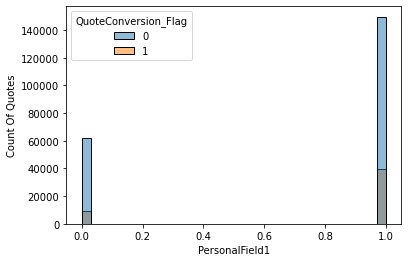

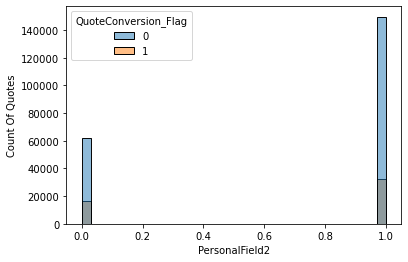

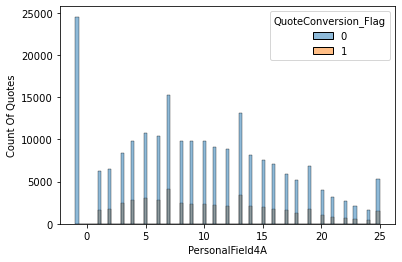

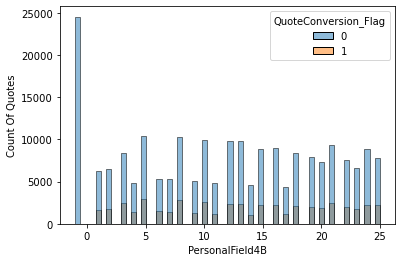

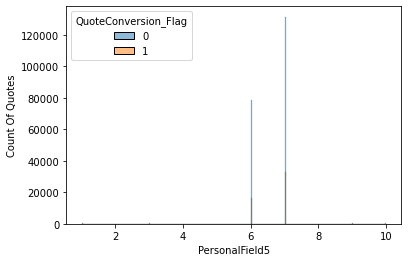

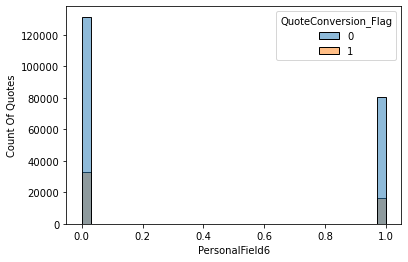

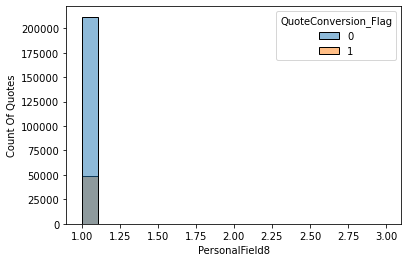

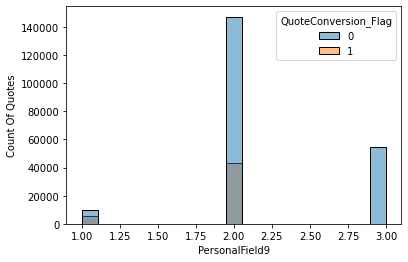

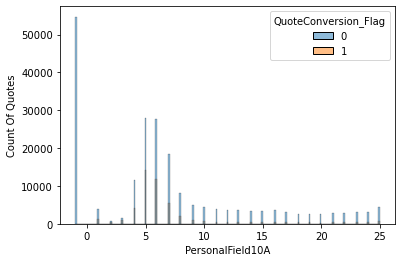

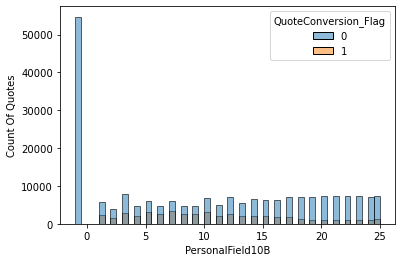

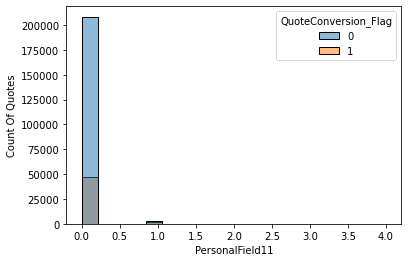

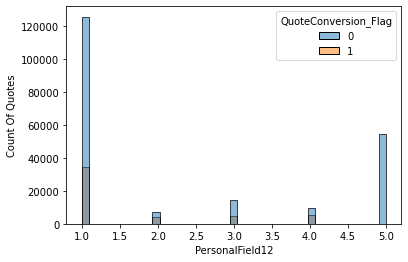

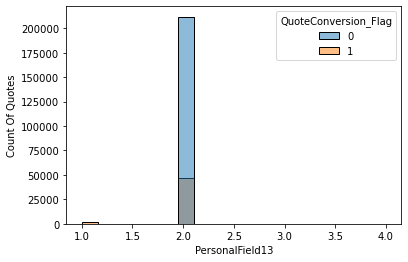

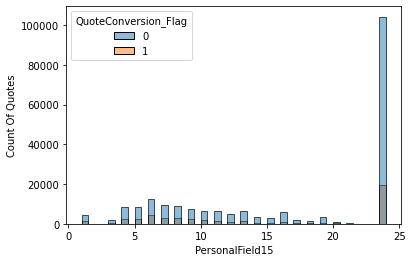

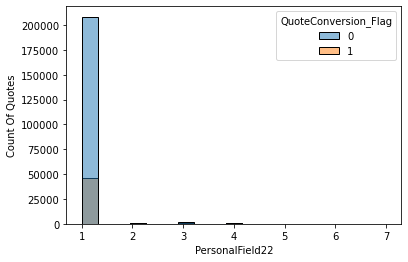

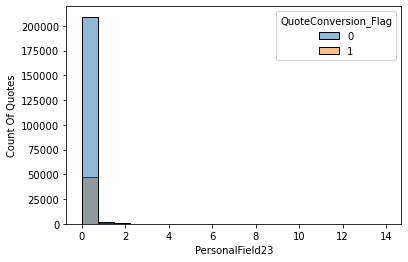

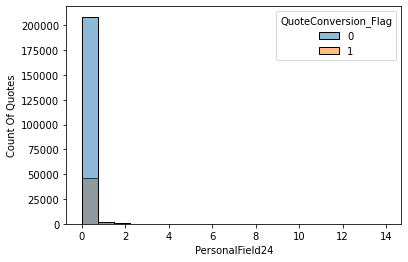

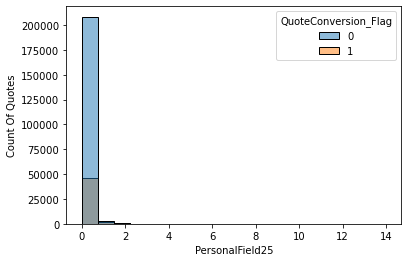

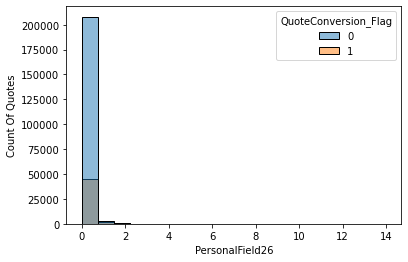

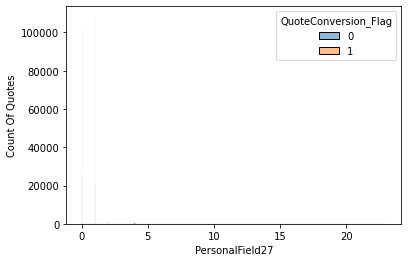

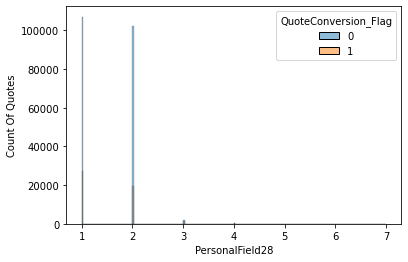

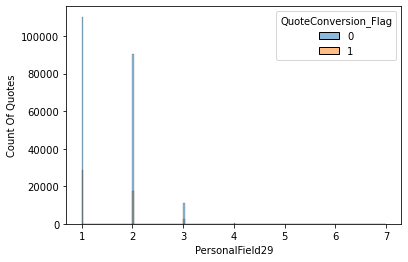

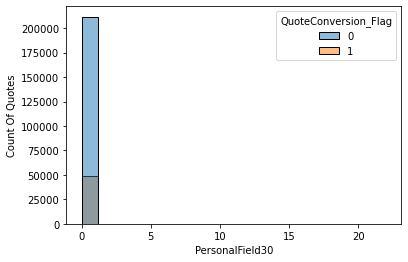

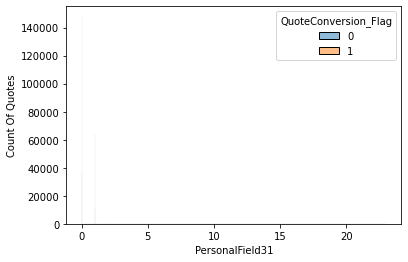

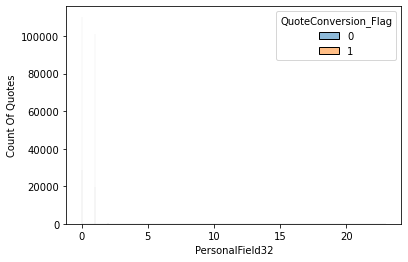

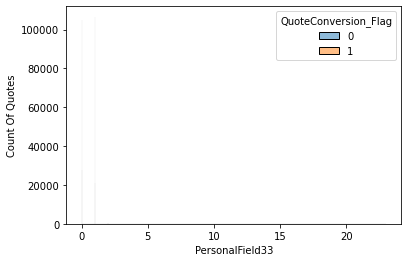

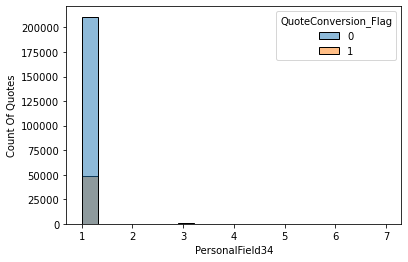

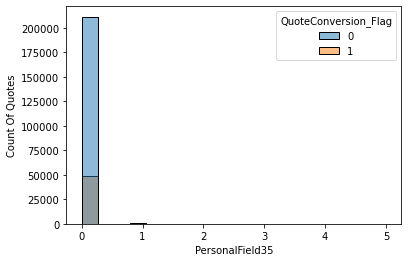

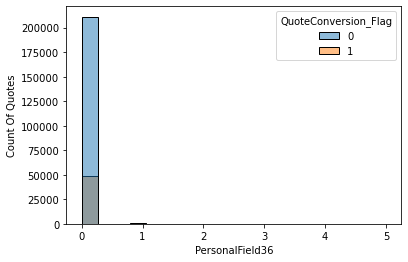

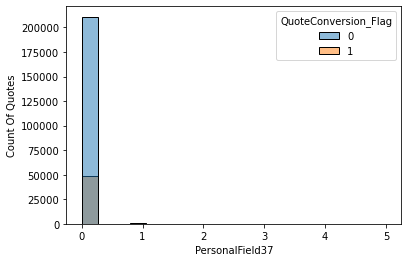

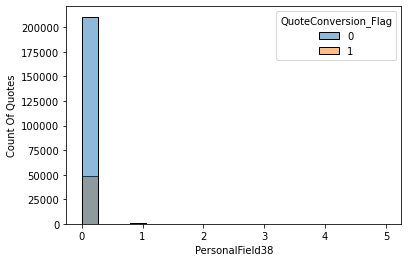

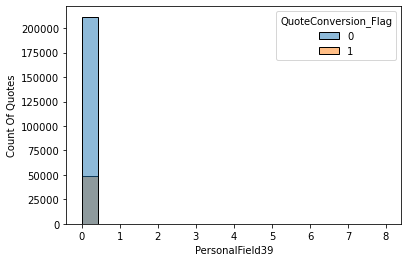

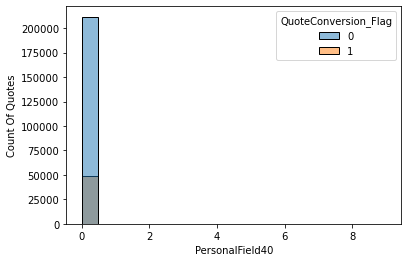

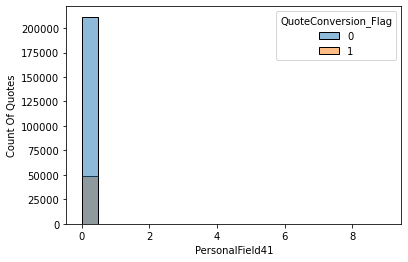

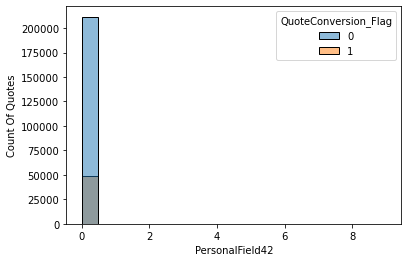

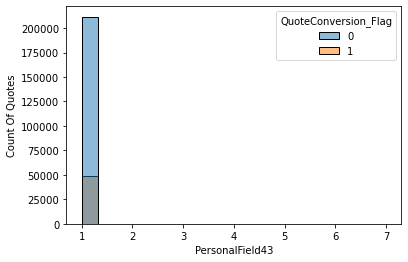

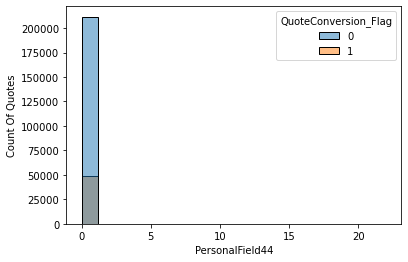

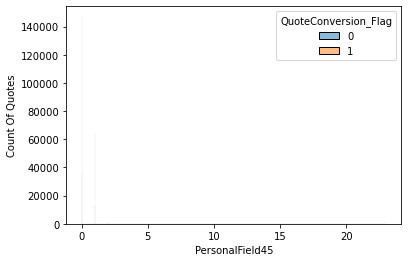

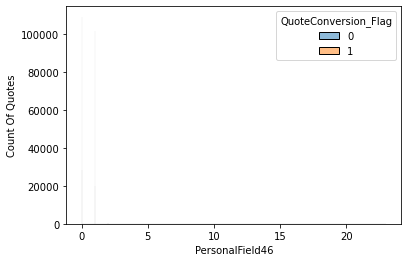

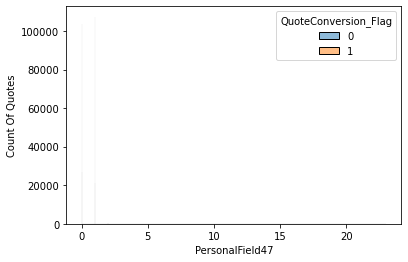

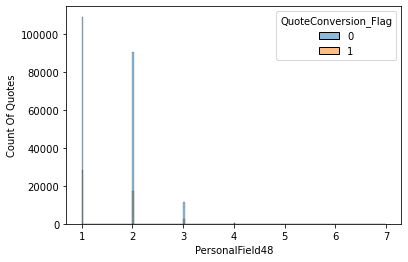

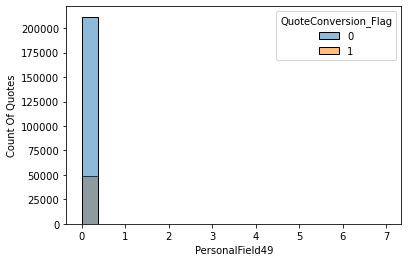

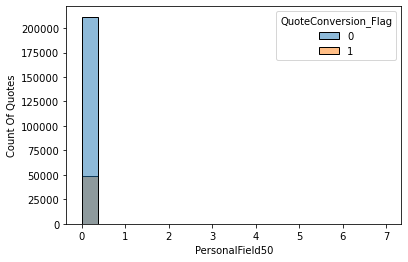

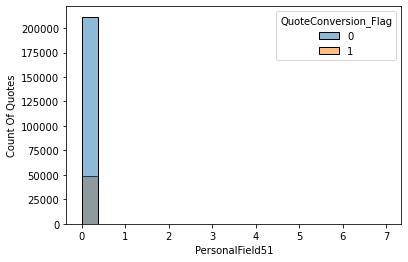

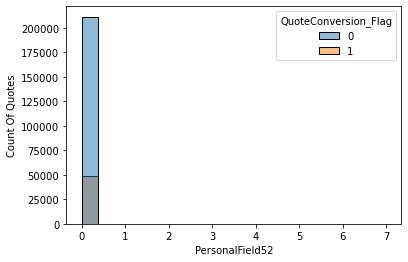

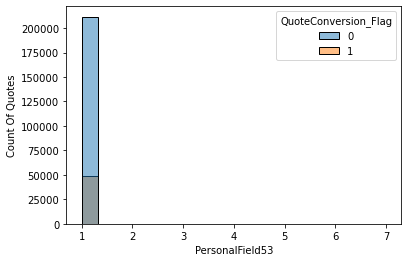

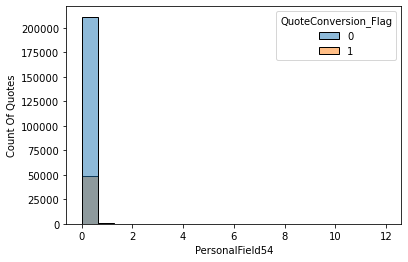

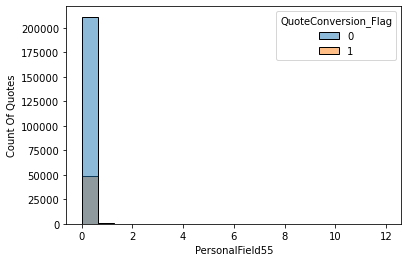

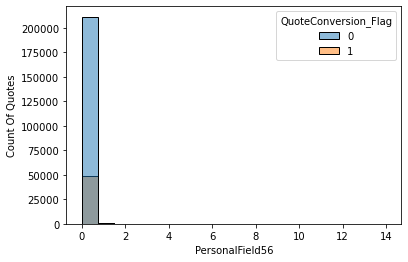

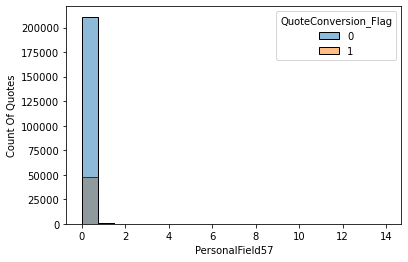

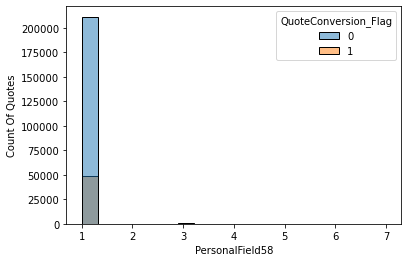

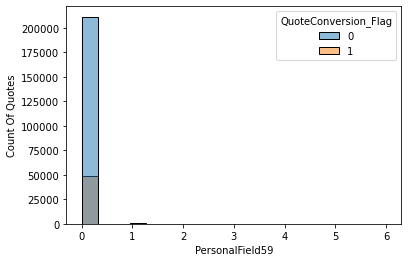

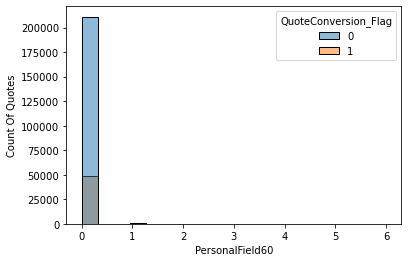

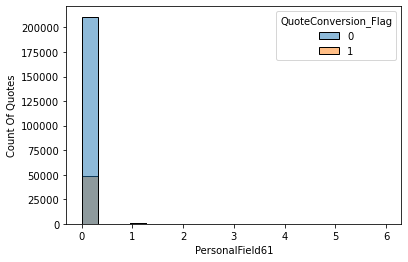

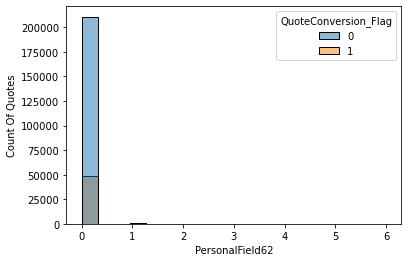

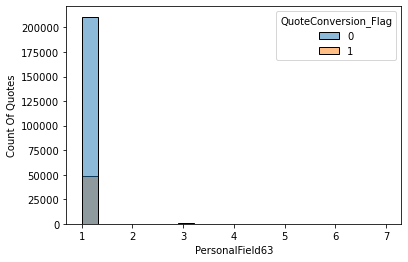

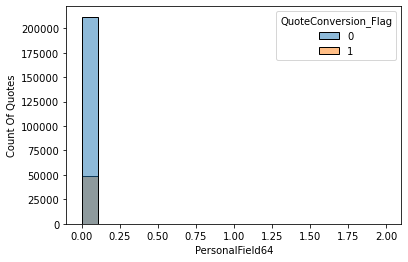

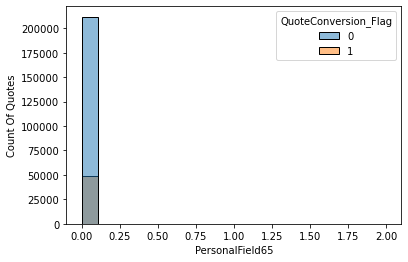

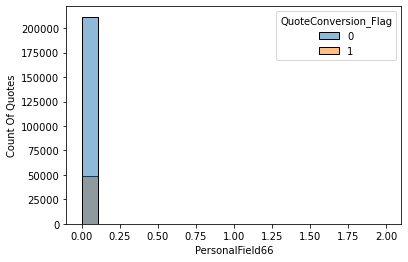

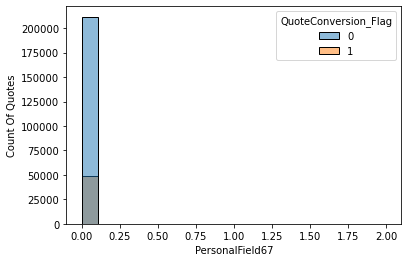

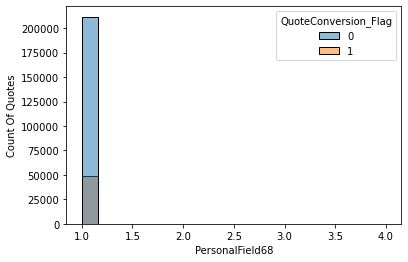

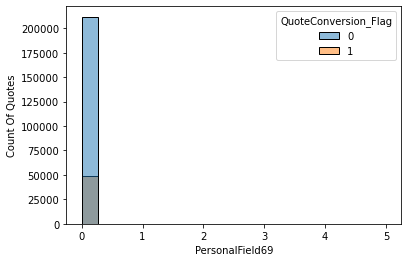

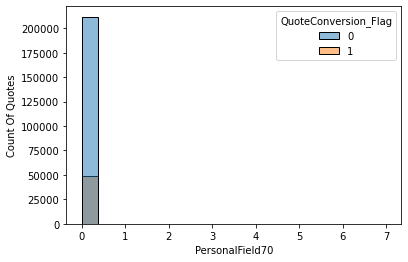

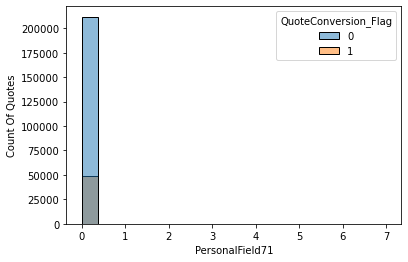

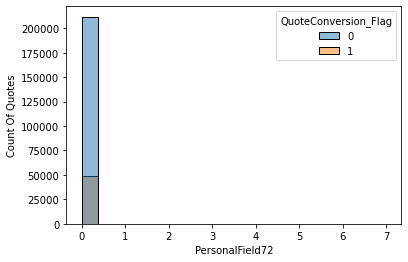

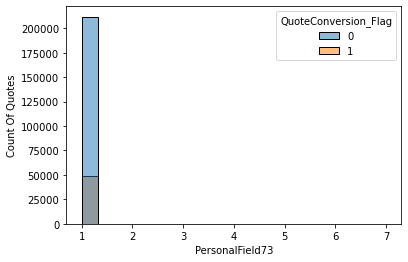

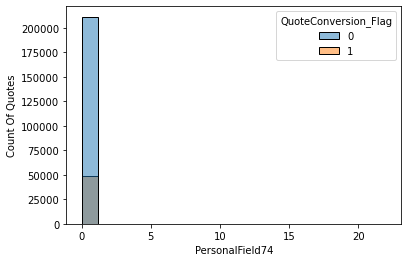

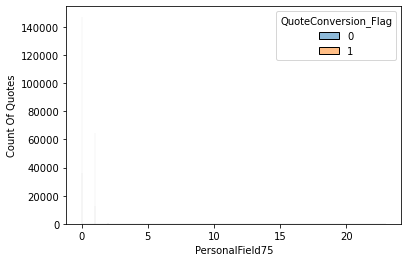

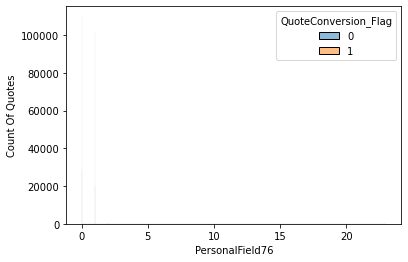

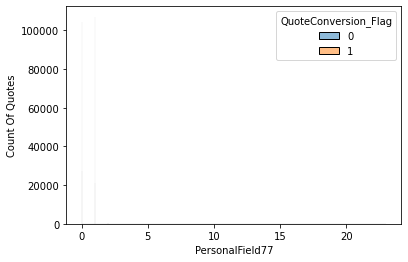

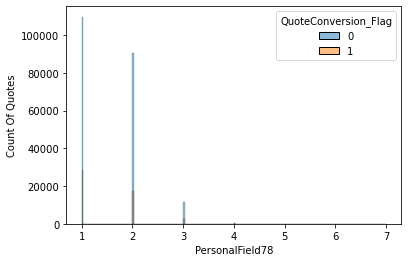

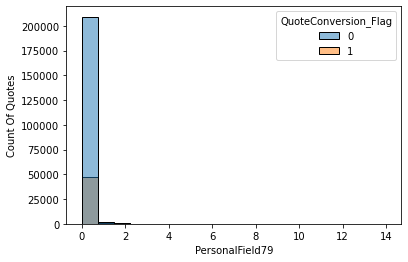

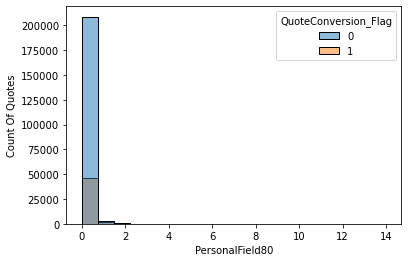

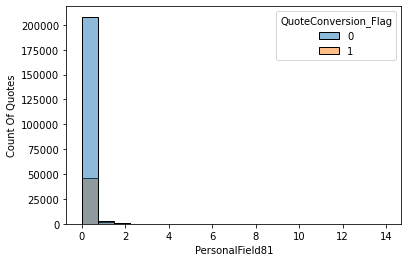

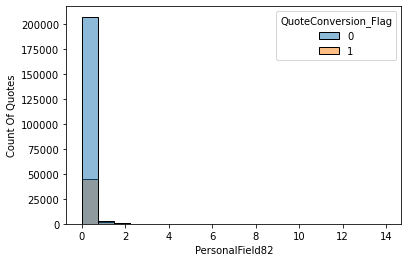

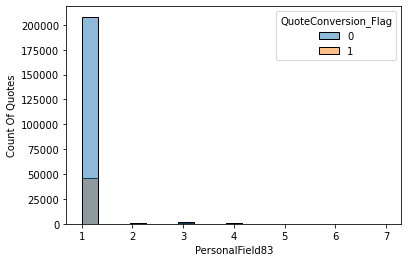

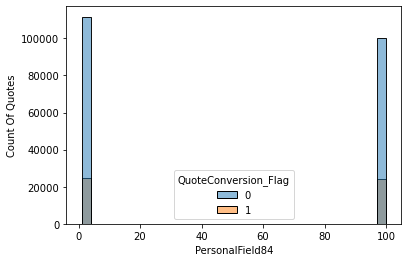

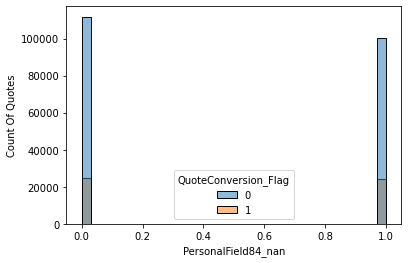

In [40]:
for feature in get_numerical_features(dataset):
    if feature != 'QuoteConversion_Flag' and len(dataset[feature].unique()) < 30:
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>CATEGORICAL FEATURES</strong>

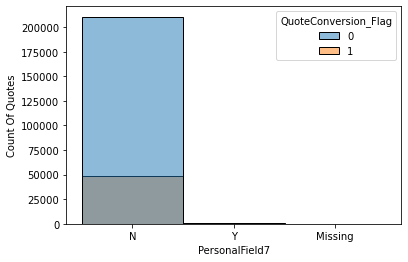

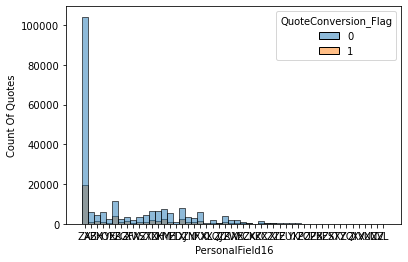

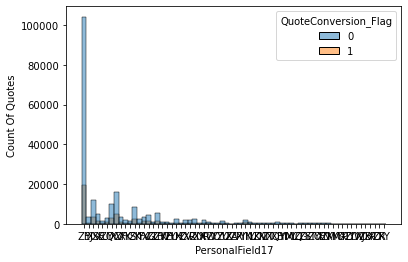

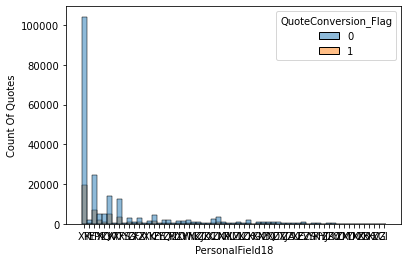

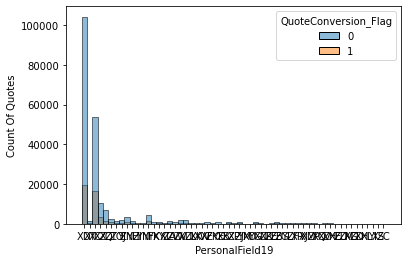

In [41]:
for feature in get_categorical_features(dataset):
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>PROPERTY FEATURES</strong>

In [42]:
dataset = extract_feature_dataset('PropertyField',data)

In [43]:
for feature in dataset.columns:
    if feature != 'QuoteConversion_Flag':
        print('{} has {} unique values'.format(feature,len(dataset[feature].unique())))

PropertyField1A has 26 unique values
PropertyField1B has 26 unique values
PropertyField2A has 2 unique values
PropertyField2B has 21 unique values
PropertyField3 has 3 unique values
PropertyField4 has 3 unique values
PropertyField5 has 2 unique values
PropertyField6 has 1 unique values
PropertyField7 has 19 unique values
PropertyField8 has 2 unique values
PropertyField9 has 3 unique values
PropertyField10 has 5 unique values
PropertyField11A has 2 unique values
PropertyField11B has 5 unique values
PropertyField12 has 7 unique values
PropertyField13 has 4 unique values
PropertyField14 has 4 unique values
PropertyField15 has 15 unique values
PropertyField16A has 26 unique values
PropertyField16B has 26 unique values
PropertyField17 has 8 unique values
PropertyField18 has 10 unique values
PropertyField19 has 10 unique values
PropertyField20 has 3 unique values
PropertyField21A has 26 unique values
PropertyField21B has 26 unique values
PropertyField22 has 5 unique values
PropertyField23 ha

In [44]:
numerical_features = get_numerical_features(dataset)
categorical_features = get_categorical_features(dataset)

In [45]:
print('Numerical Features : ', numerical_features)
print('Categorical Features : ', categorical_features)

Numerical Features :  ['PropertyField1A', 'PropertyField1B', 'PropertyField2A', 'PropertyField2B', 'PropertyField6', 'PropertyField8', 'PropertyField9', 'PropertyField10', 'PropertyField11A', 'PropertyField11B', 'PropertyField12', 'PropertyField13', 'PropertyField15', 'PropertyField16A', 'PropertyField16B', 'PropertyField17', 'PropertyField18', 'PropertyField19', 'PropertyField20', 'PropertyField21A', 'PropertyField21B', 'PropertyField22', 'PropertyField23', 'PropertyField24A', 'PropertyField24B', 'PropertyField25', 'PropertyField26A', 'PropertyField26B', 'PropertyField27', 'PropertyField29', 'PropertyField35', 'PropertyField39A', 'PropertyField39B', 'PropertyField29_nan', 'QuoteConversion_Flag']
Categorical Features :  ['PropertyField3', 'PropertyField4', 'PropertyField5', 'PropertyField7', 'PropertyField14', 'PropertyField28', 'PropertyField30', 'PropertyField31', 'PropertyField32', 'PropertyField33', 'PropertyField34', 'PropertyField36', 'PropertyField37', 'PropertyField38']


<strong>DISCRETE NUMERICAL FEATURES</strong>

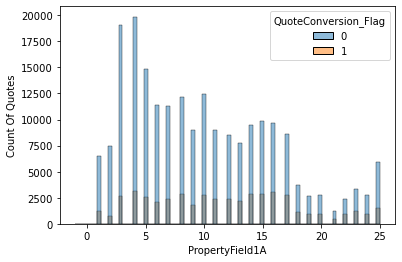

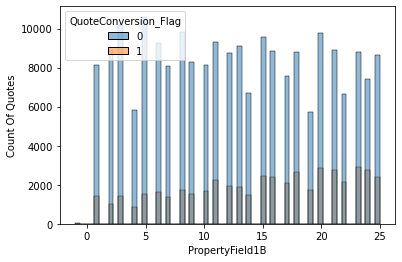

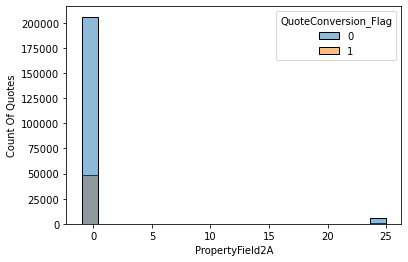

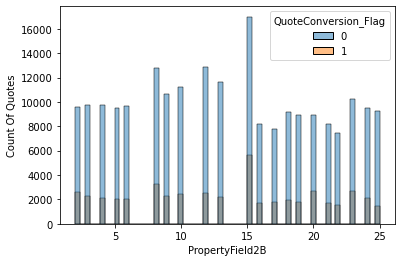

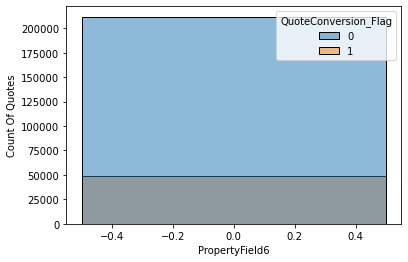

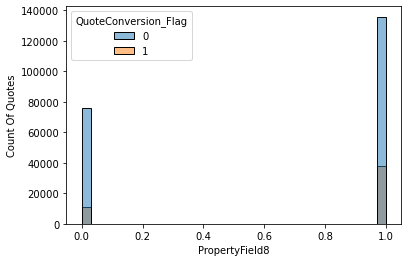

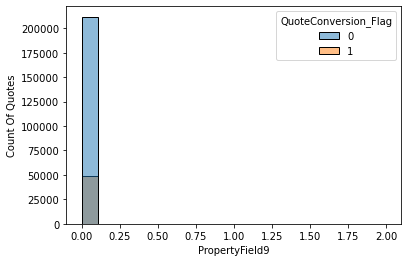

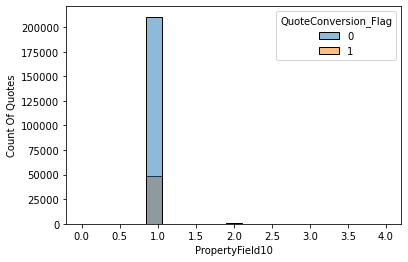

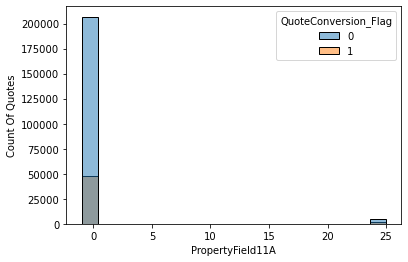

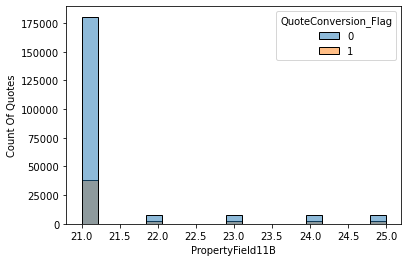

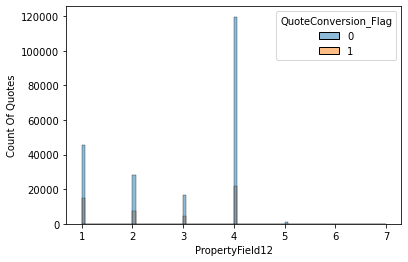

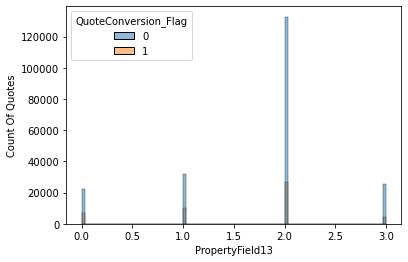

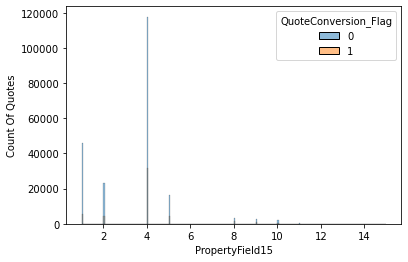

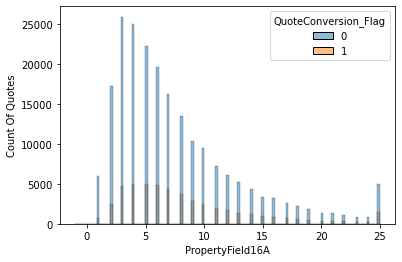

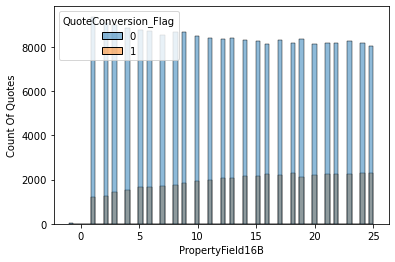

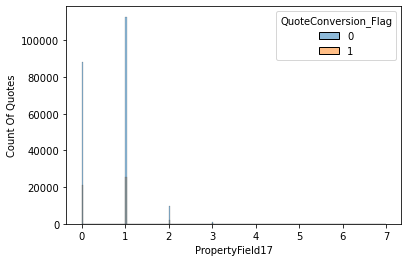

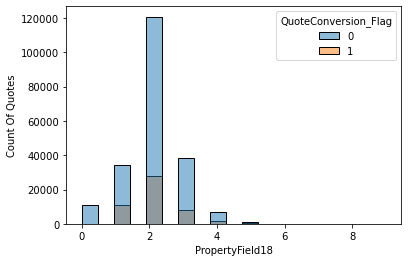

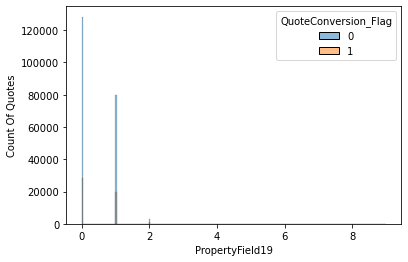

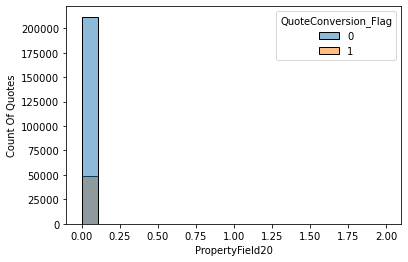

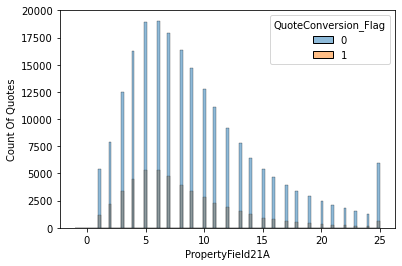

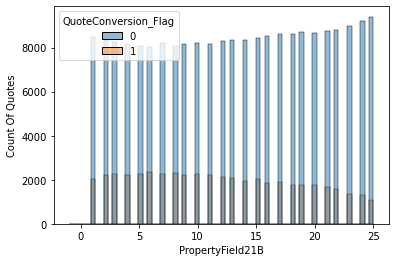

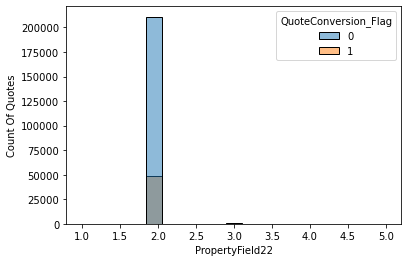

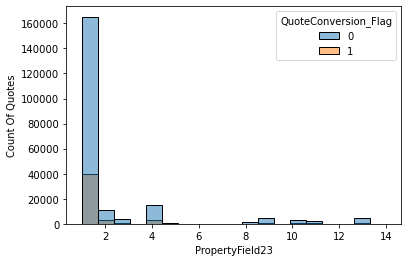

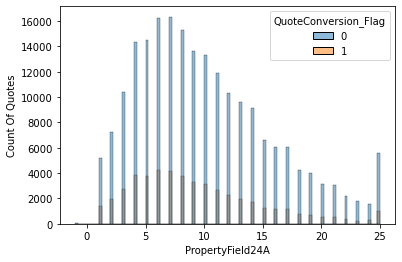

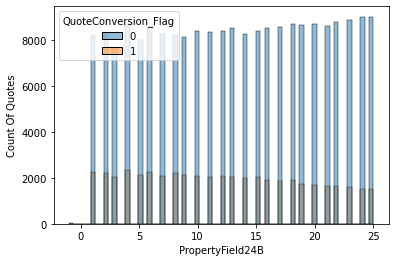

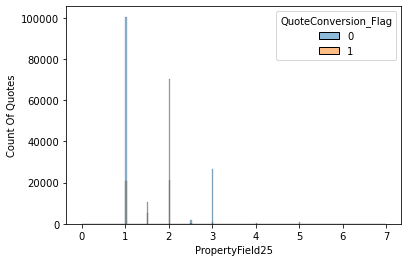

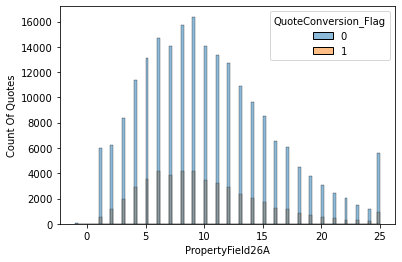

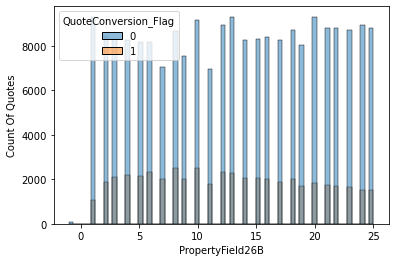

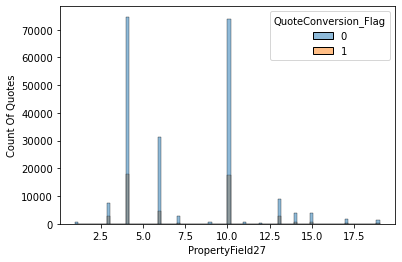

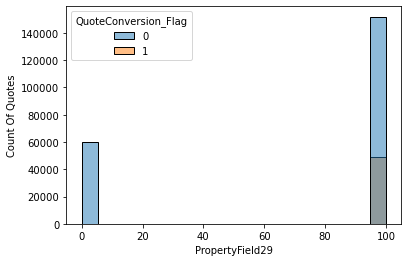

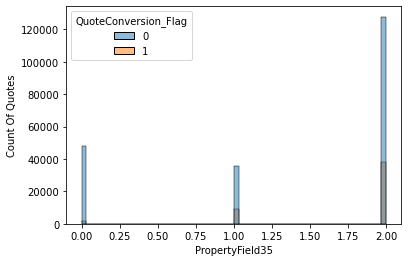

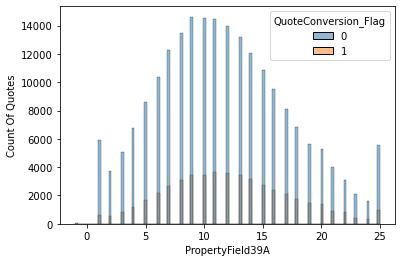

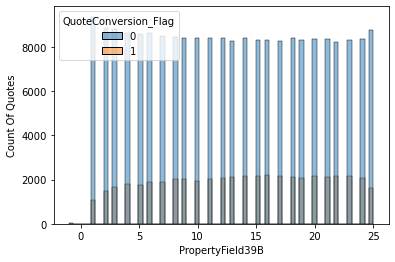

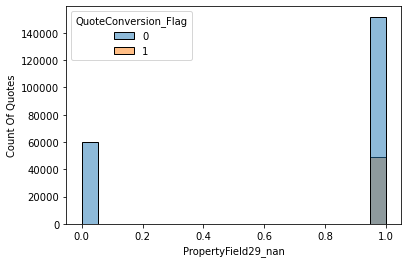

In [46]:
for feature in get_numerical_features(dataset):
    if feature != 'QuoteConversion_Flag' and len(dataset[feature].unique()) < 30:
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>CATEGORICAL FEATURES</strong>

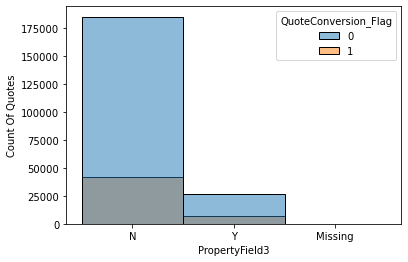

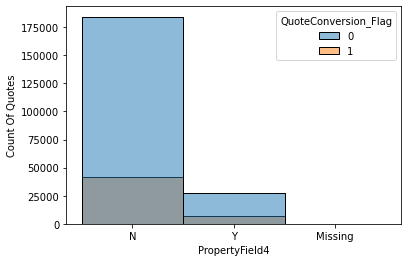

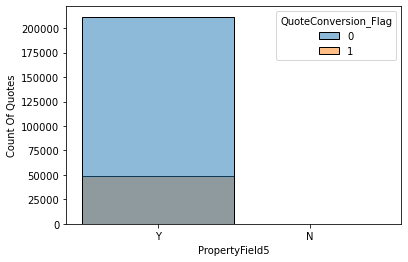

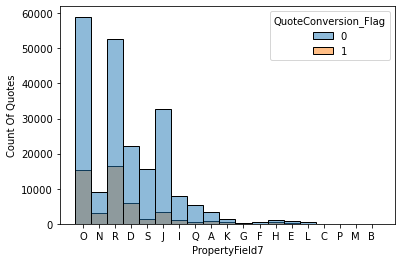

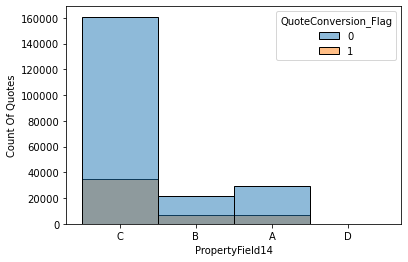

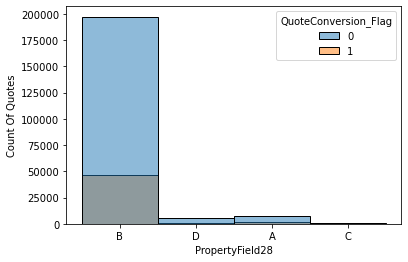

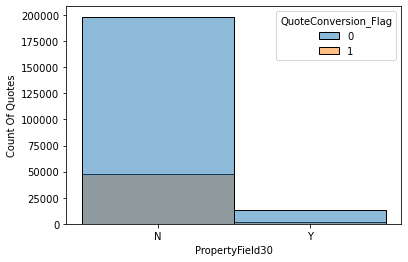

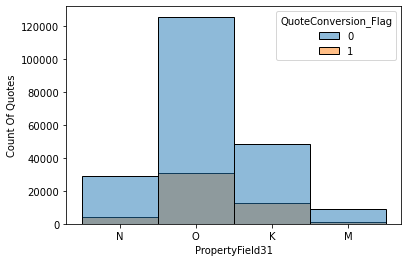

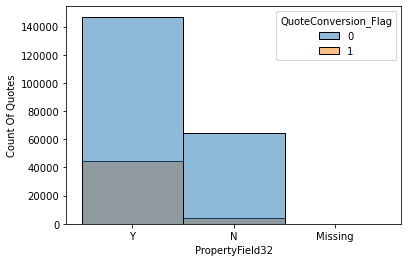

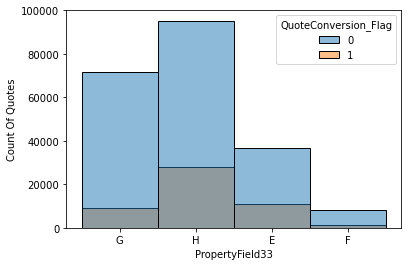

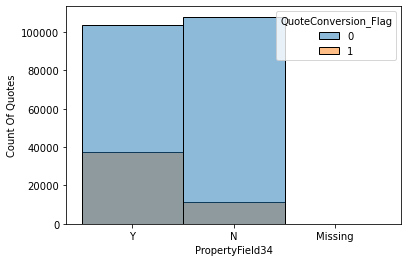

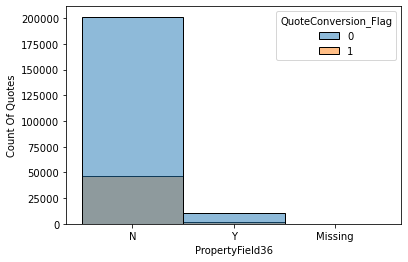

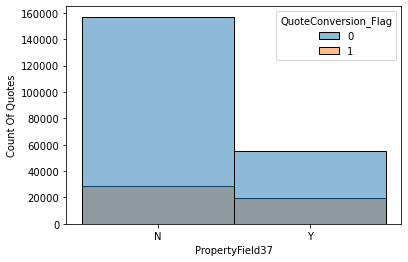

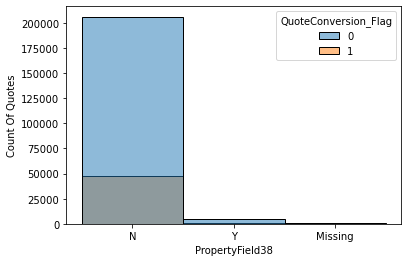

In [47]:
for feature in get_categorical_features(dataset):
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>GEOGRAPHIC FEATURES</strong>

In [48]:
dataset = extract_feature_dataset('GeographicField',data)

In [49]:
for feature in dataset.columns:
    if feature != 'QuoteConversion_Flag':
        print('{} has {} unique values'.format(feature,len(dataset[feature].unique())))

GeographicField1A has 26 unique values
GeographicField1B has 26 unique values
GeographicField2A has 26 unique values
GeographicField2B has 26 unique values
GeographicField3A has 25 unique values
GeographicField3B has 25 unique values
GeographicField4A has 25 unique values
GeographicField4B has 25 unique values
GeographicField5A has 2 unique values
GeographicField5B has 14 unique values
GeographicField6A has 26 unique values
GeographicField6B has 26 unique values
GeographicField7A has 25 unique values
GeographicField7B has 24 unique values
GeographicField8A has 26 unique values
GeographicField8B has 25 unique values
GeographicField9A has 26 unique values
GeographicField9B has 26 unique values
GeographicField10A has 1 unique values
GeographicField10B has 2 unique values
GeographicField11A has 26 unique values
GeographicField11B has 25 unique values
GeographicField12A has 26 unique values
GeographicField12B has 24 unique values
GeographicField13A has 25 unique values
GeographicField13B ha

In [50]:
numerical_features = get_numerical_features(dataset)
categorical_features = get_categorical_features(dataset)

In [51]:
print('Numerical Features : ', numerical_features)
print('Categorical Features : ', categorical_features)

Numerical Features :  ['GeographicField1A', 'GeographicField1B', 'GeographicField2A', 'GeographicField2B', 'GeographicField3A', 'GeographicField3B', 'GeographicField4A', 'GeographicField4B', 'GeographicField5A', 'GeographicField5B', 'GeographicField6A', 'GeographicField6B', 'GeographicField7A', 'GeographicField7B', 'GeographicField8A', 'GeographicField8B', 'GeographicField9A', 'GeographicField9B', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'Geog

<strong>DISCRETE NUMERICAL FEATURES</strong>

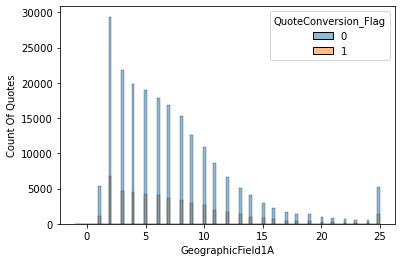

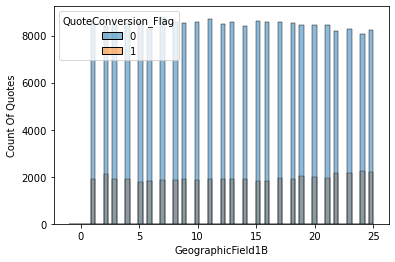

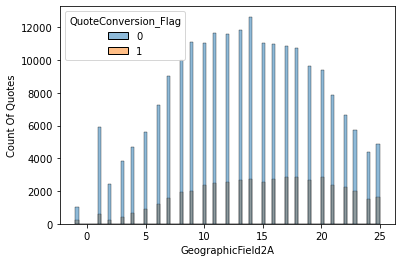

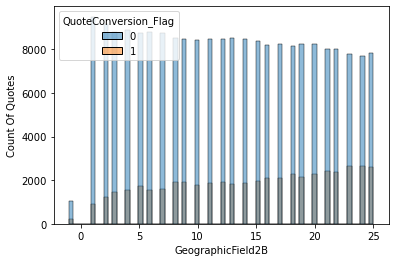

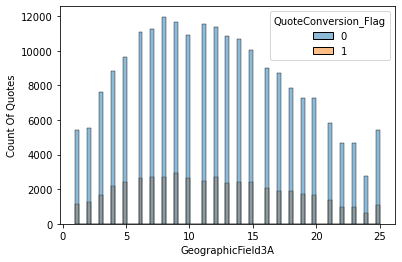

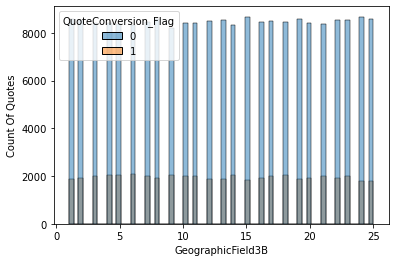

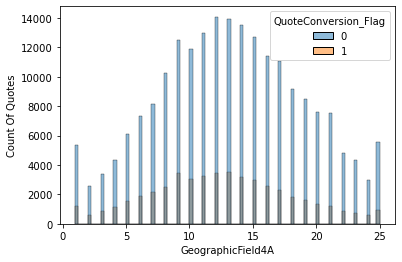

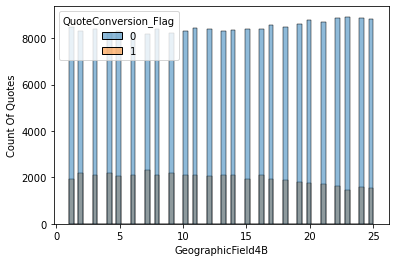

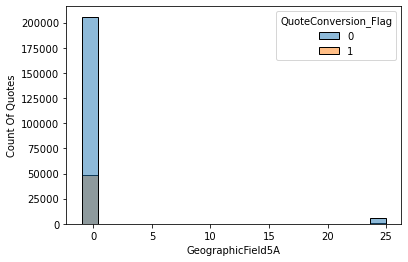

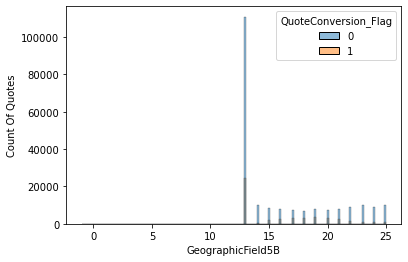

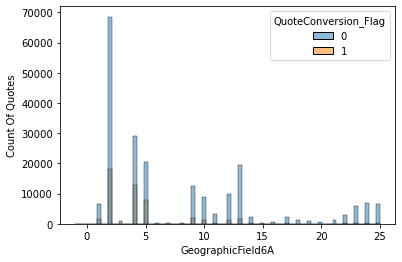

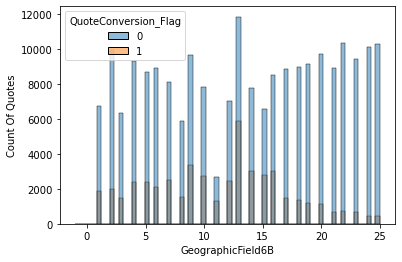

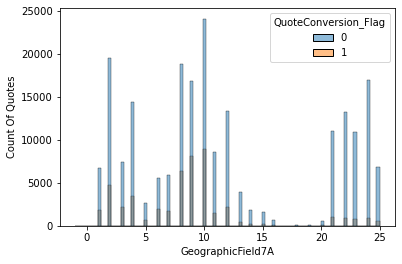

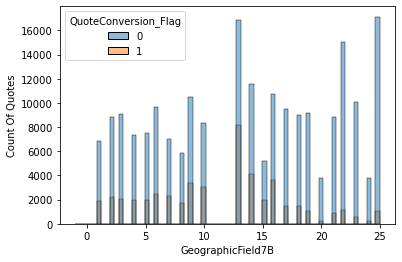

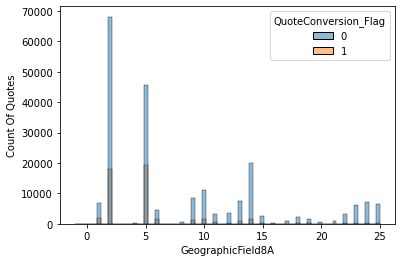

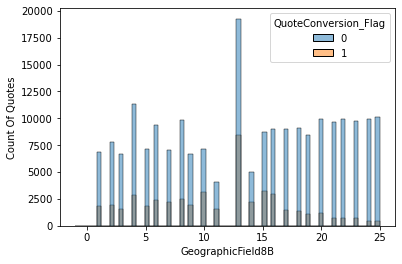

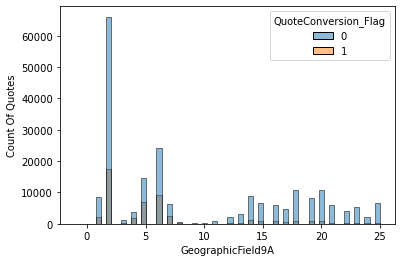

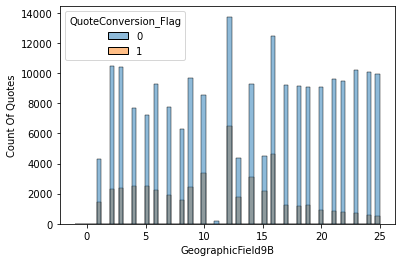

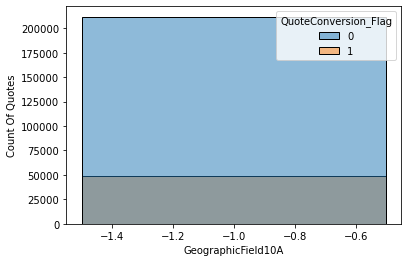

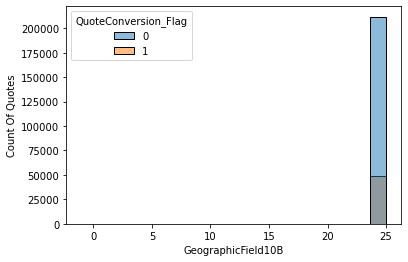

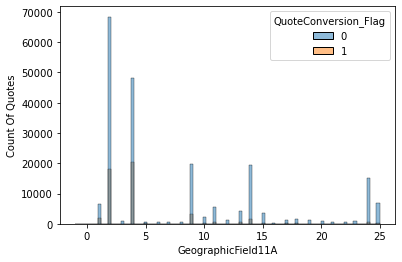

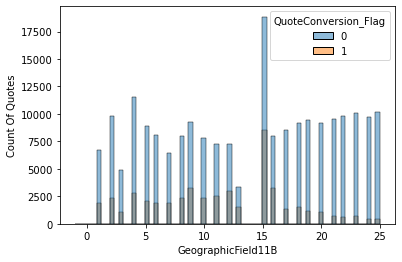

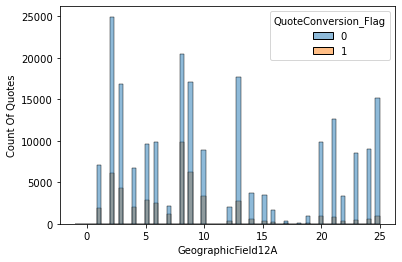

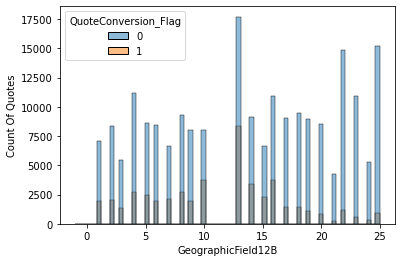

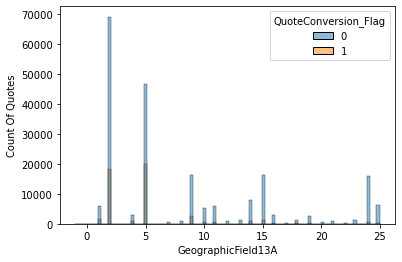

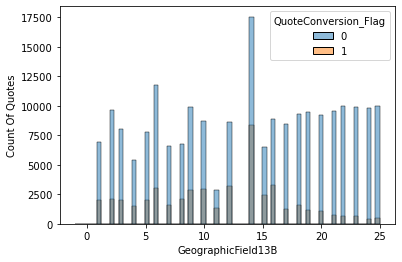

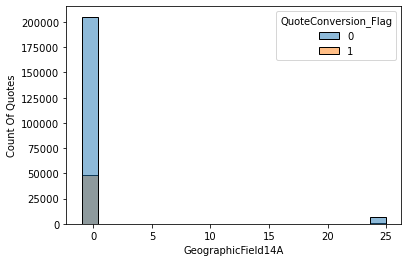

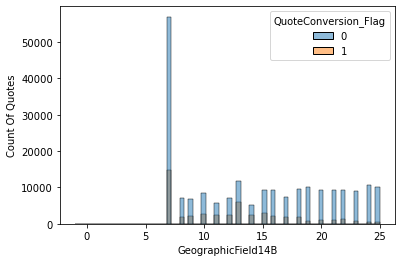

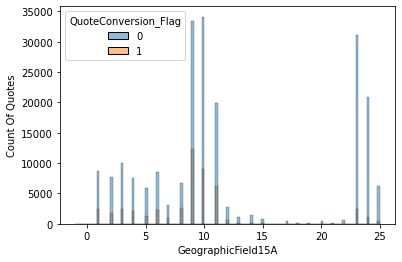

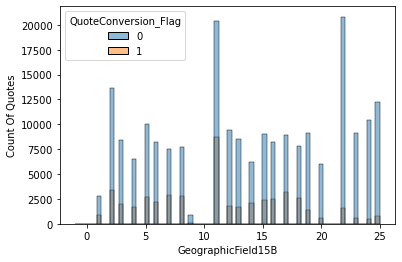

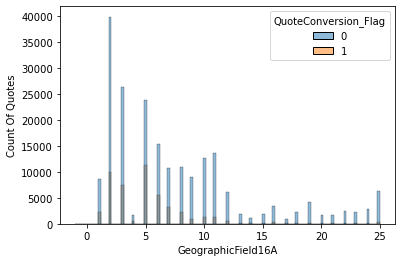

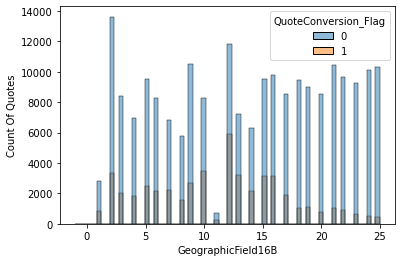

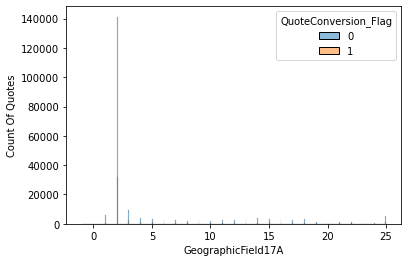

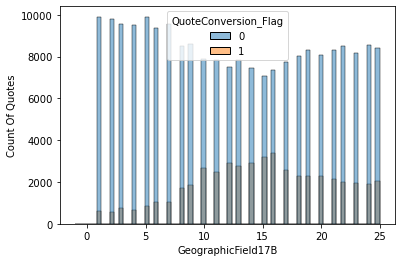

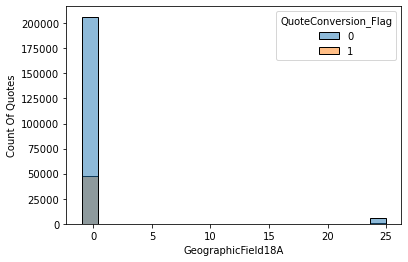

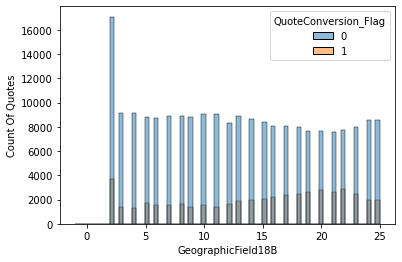

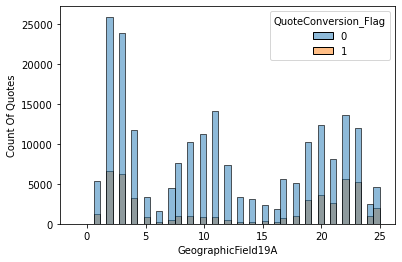

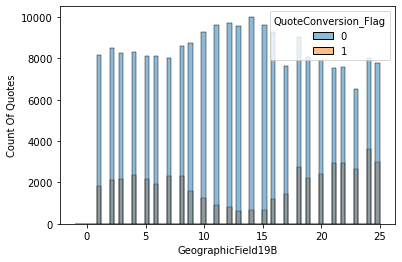

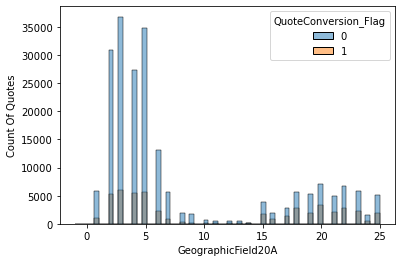

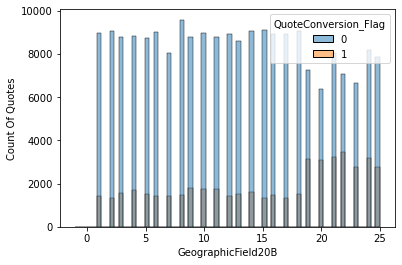

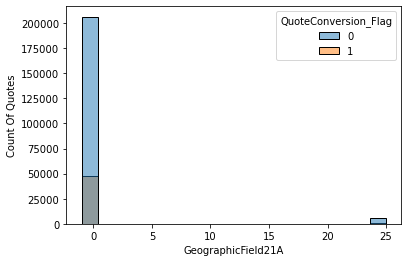

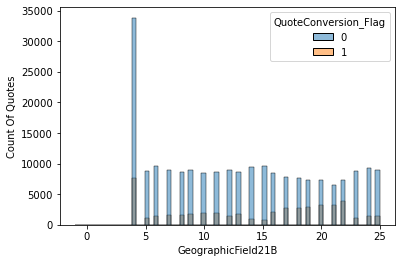

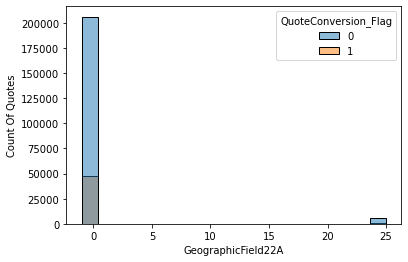

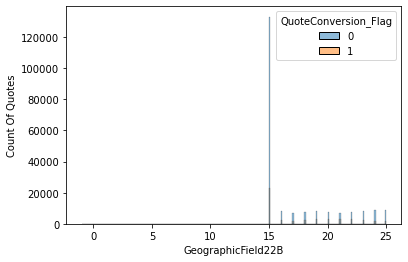

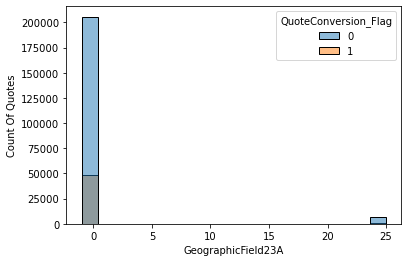

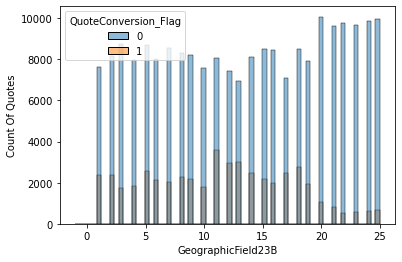

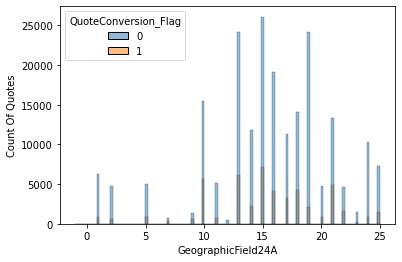

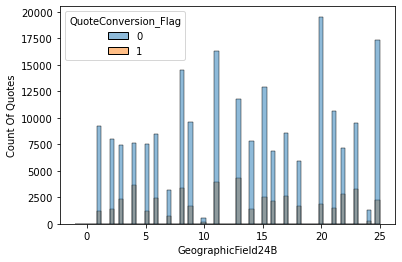

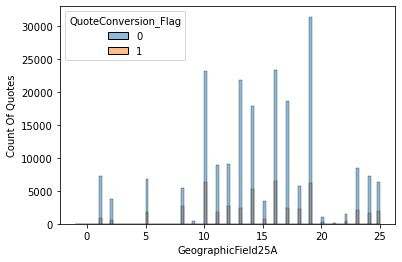

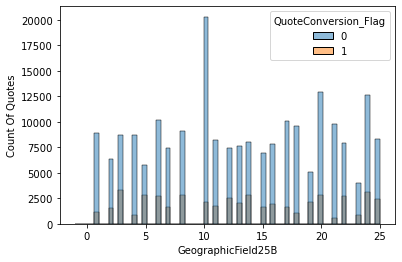

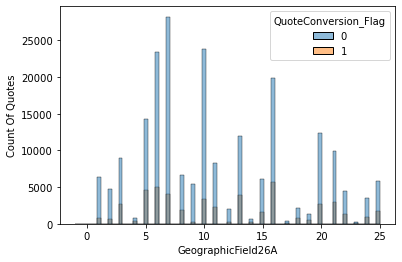

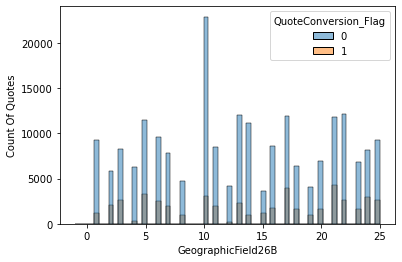

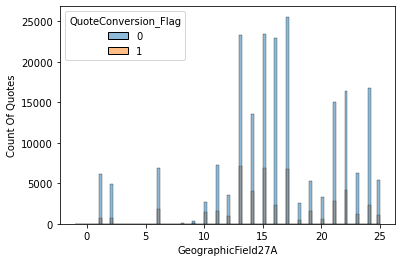

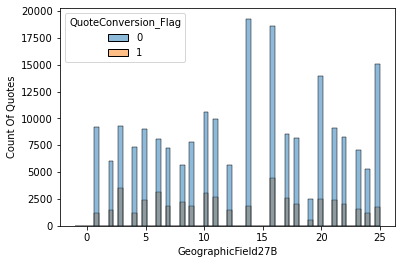

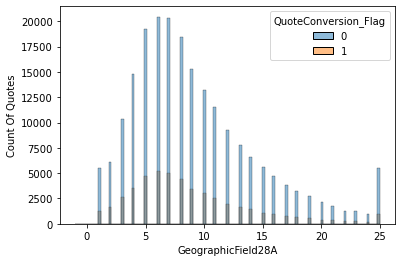

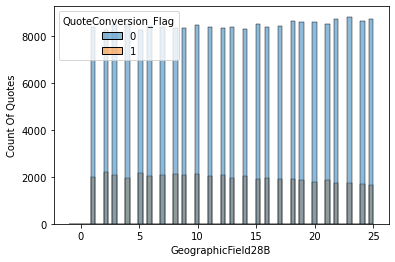

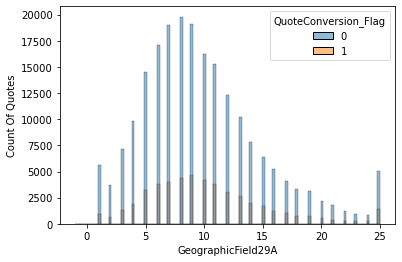

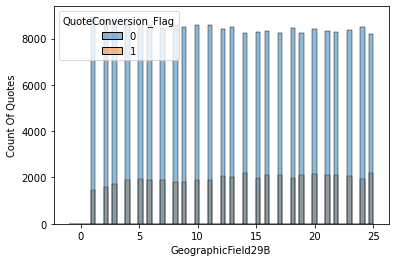

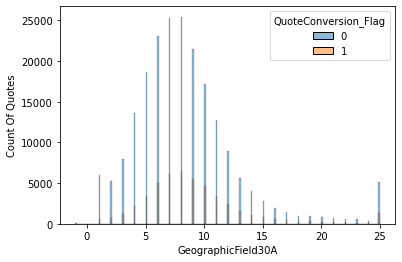

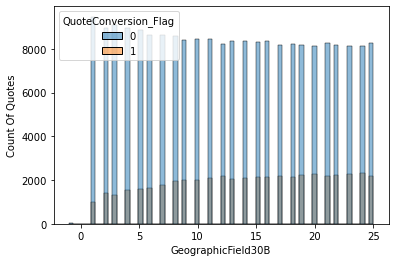

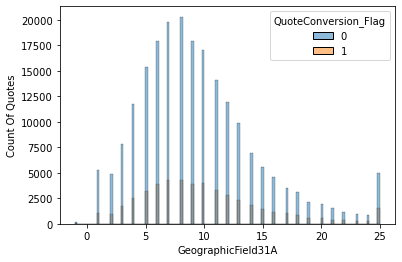

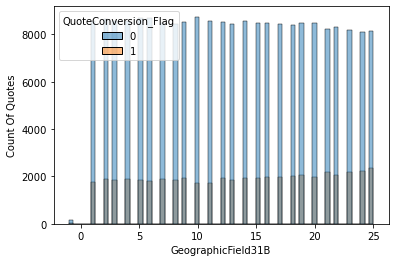

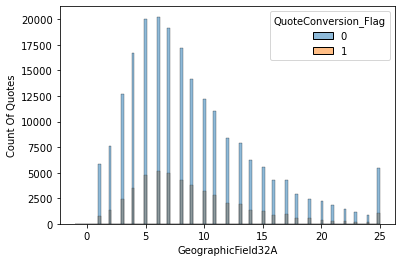

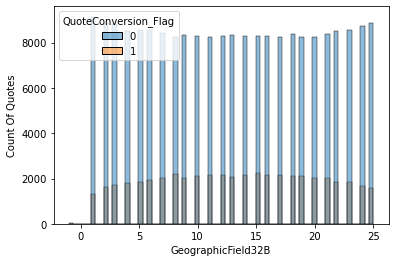

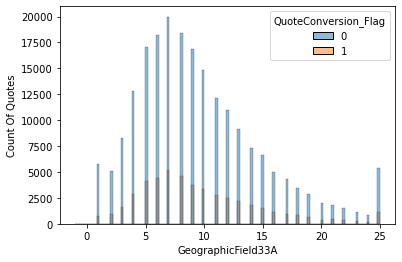

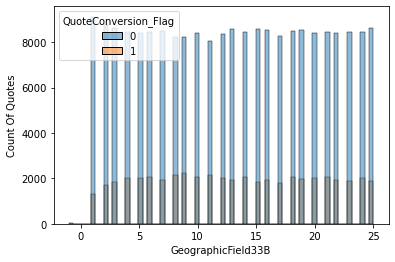

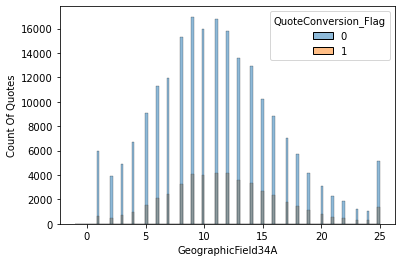

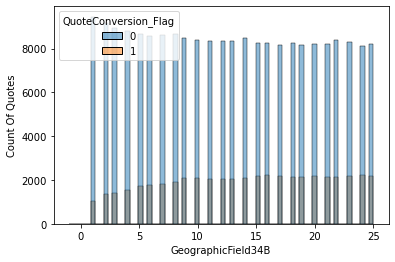

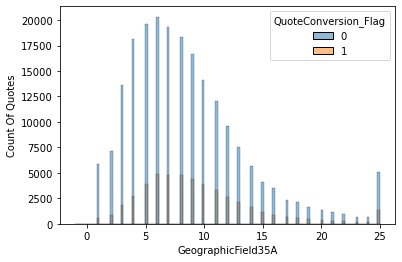

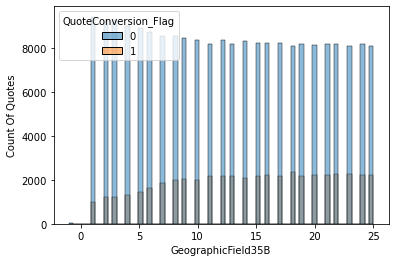

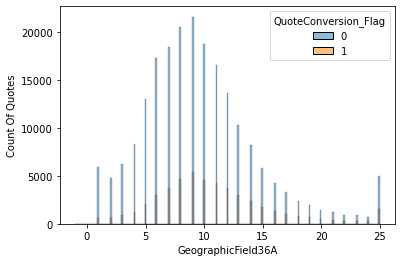

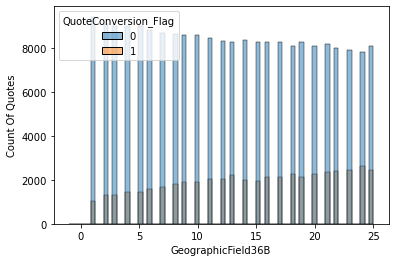

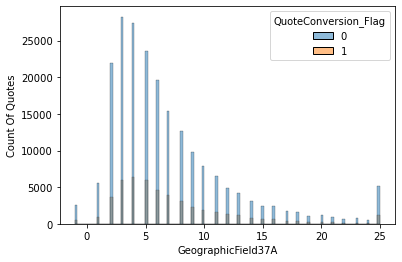

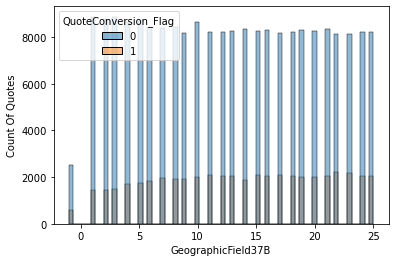

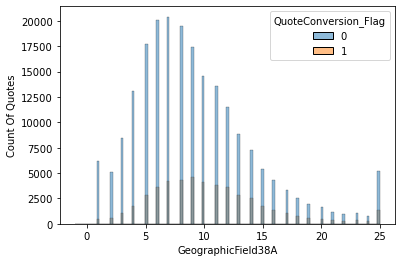

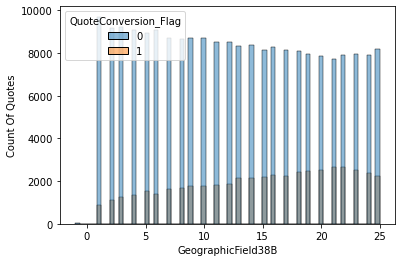

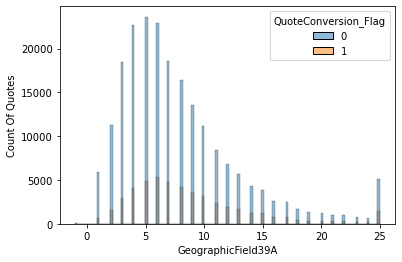

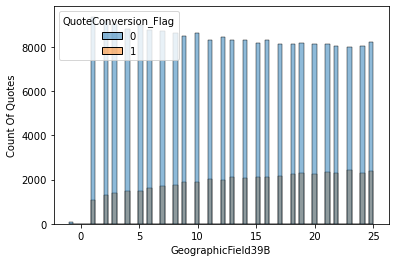

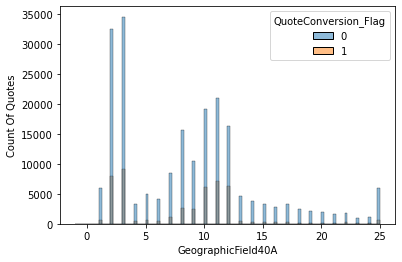

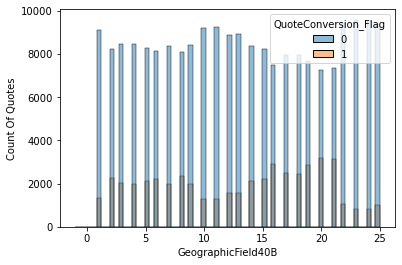

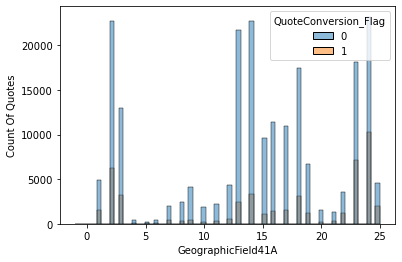

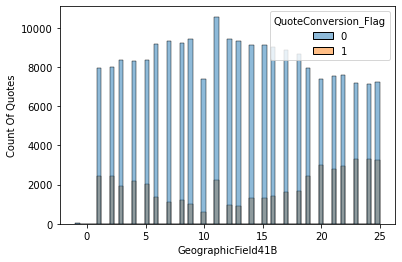

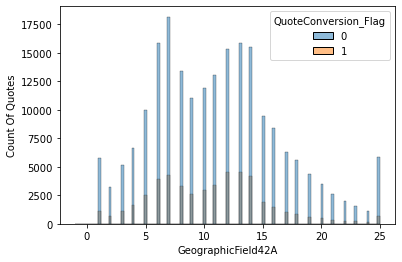

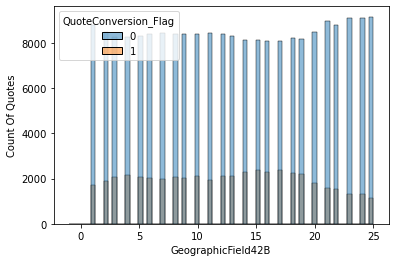

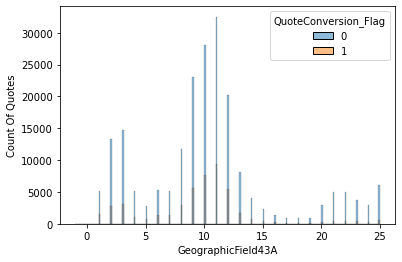

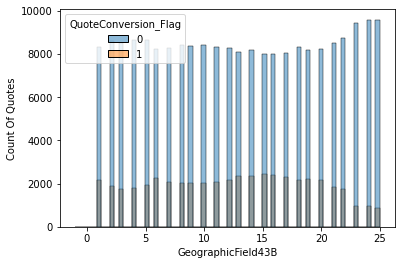

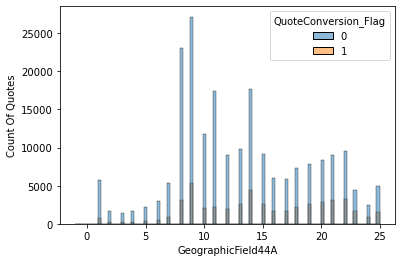

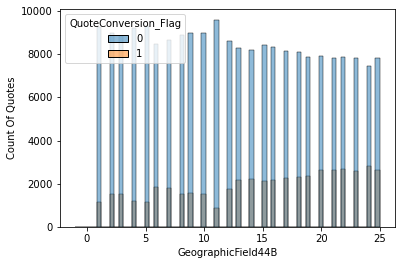

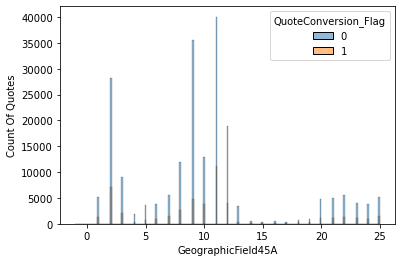

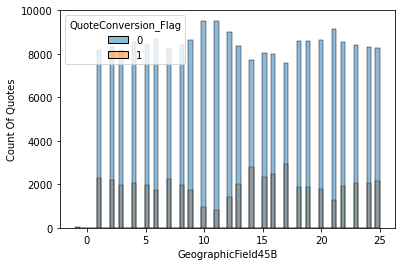

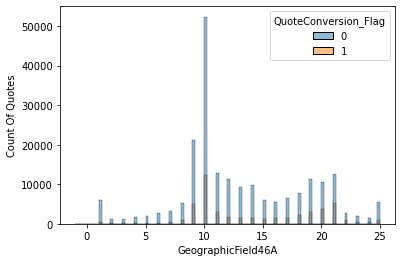

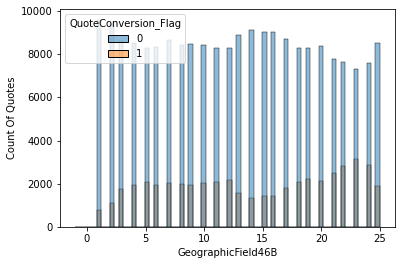

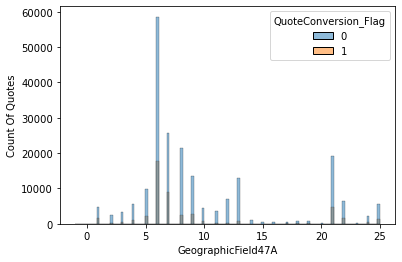

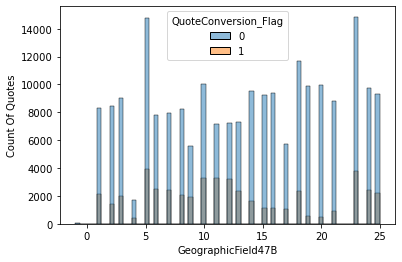

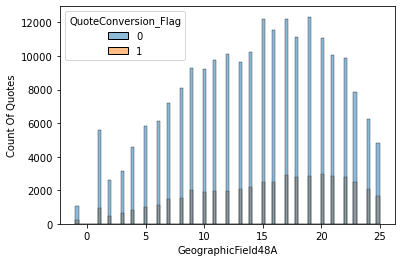

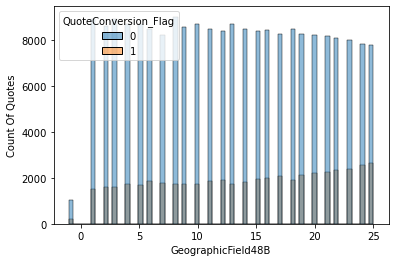

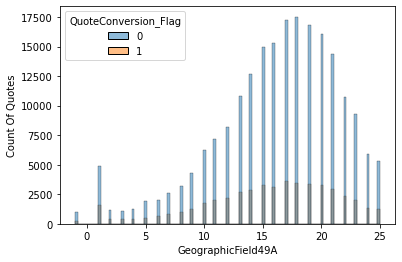

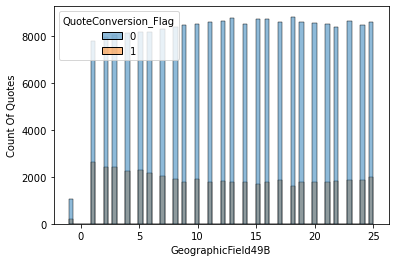

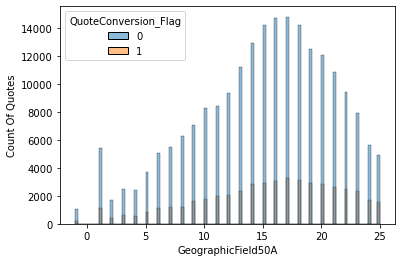

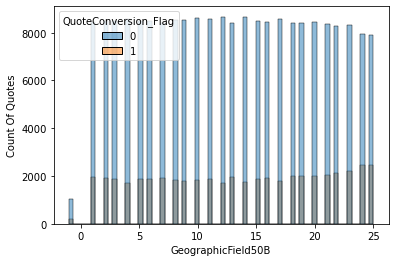

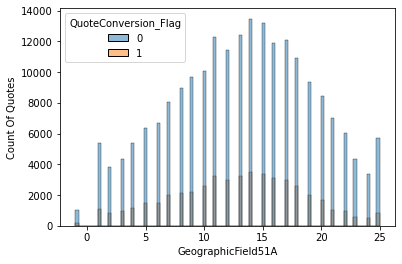

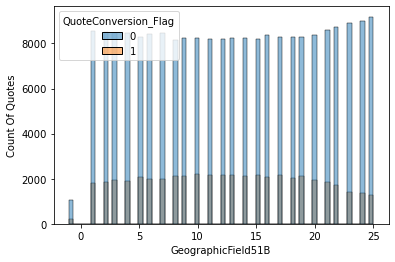

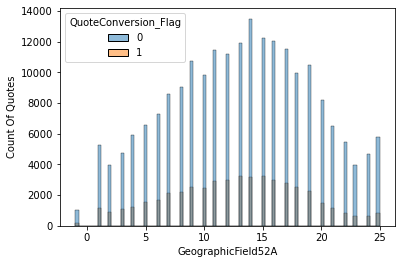

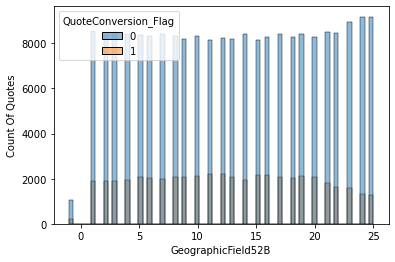

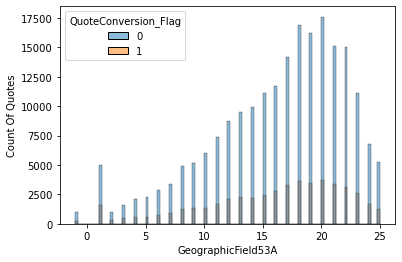

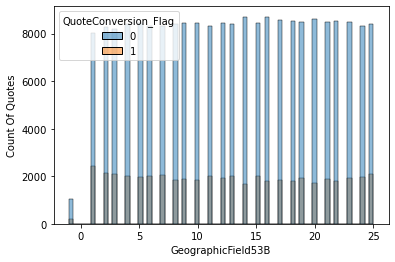

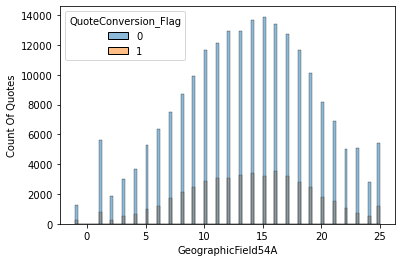

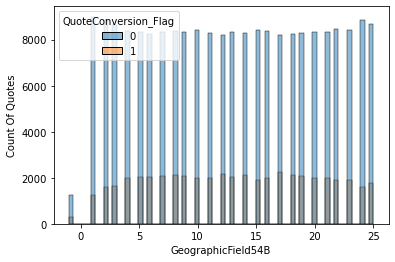

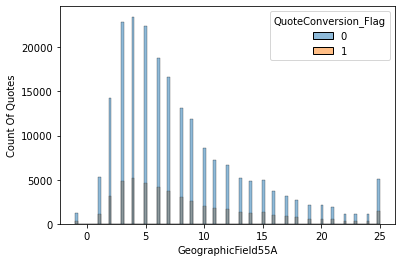

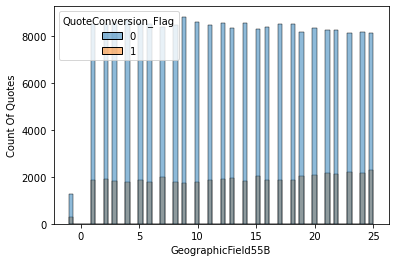

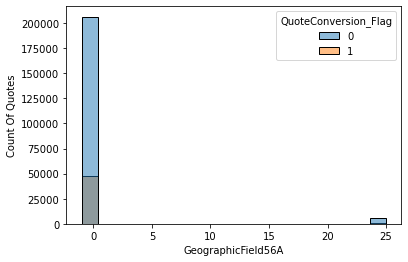

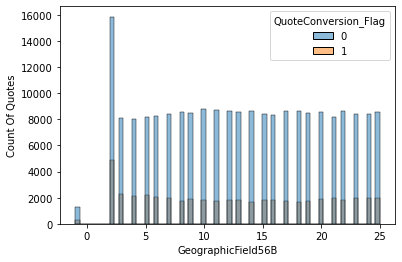

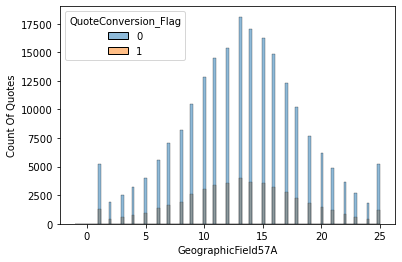

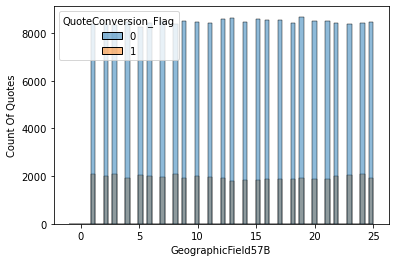

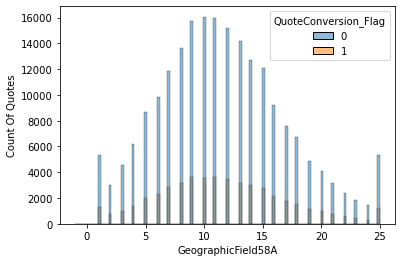

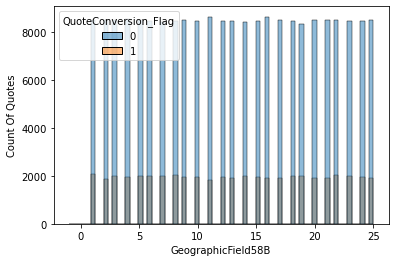

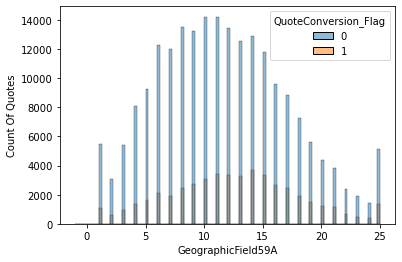

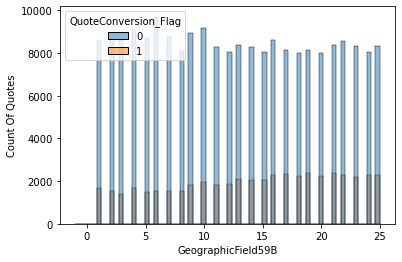

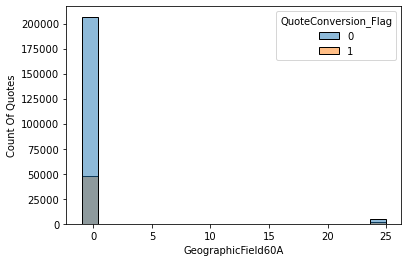

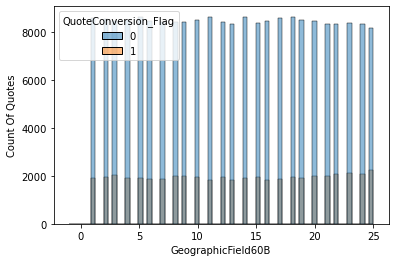

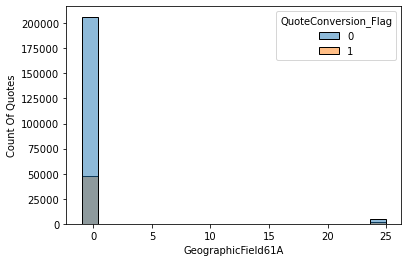

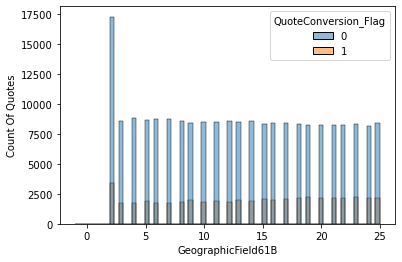

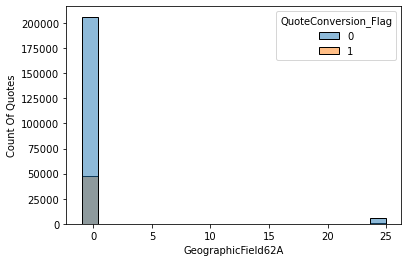

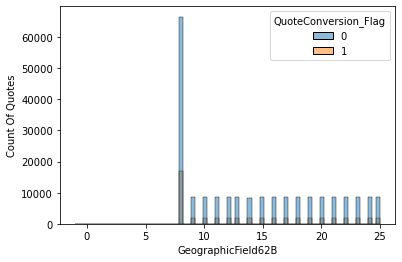

In [52]:
for feature in get_numerical_features(dataset):
    if feature != 'QuoteConversion_Flag' and len(dataset[feature].unique()) < 30:
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>CATEGORICAL FEATURES</strong>

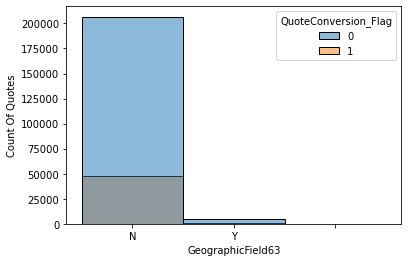

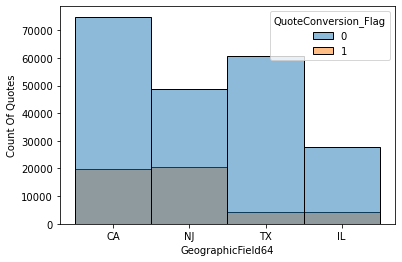

In [53]:
for feature in get_categorical_features(dataset):
        sns.histplot(data = dataset, x = feature, hue = 'QuoteConversion_Flag')
        plt.xlabel(feature)
        plt.ylabel('Count Of Quotes')
        plt.show()

<strong>OBSERVATIONS FOR PERSONAL, PROPERTY & GEOGRAPHIC FEATURES: </strong>
* Similar observations like done for Field, Coverage and Sales features can be done using the distribution curves plotted but since the nature of the features being used is anonymised they dont provide much insight into what exactly the features are depicting.

<h3>ORIGNAL_QUOTE_DATE : TEMPORAL VARIABLE</h3>

In [54]:
data['Original_Quote_Date'] = pd.to_datetime(data['Original_Quote_Date'], format='%Y-%m-%d')
data['Original_Quote_Day'] = data['Original_Quote_Date'].apply(lambda x: x.day)
data['Original_Quote_Month'] = data['Original_Quote_Date'].apply(lambda x: x.month)
data['Original_Quote_Quater'] = data['Original_Quote_Date'].apply(lambda x: math.ceil(x.month/3))
data['Original_Quote_Year'] = data['Original_Quote_Date'].apply(lambda x: x.year)

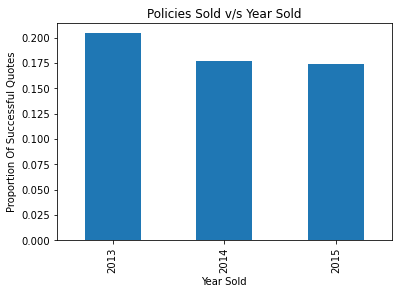

In [55]:
(data.groupby(['Original_Quote_Year'])['QuoteConversion_Flag'].sum()/data.groupby(['Original_Quote_Year'])['QuoteConversion_Flag'].count()).plot.bar()
plt.xlabel('Year Sold')
plt.ylabel('Proportion Of Successful Quotes')
plt.title('Policies Sold v/s Year Sold')
plt.show()

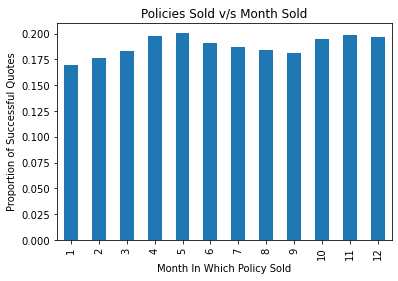

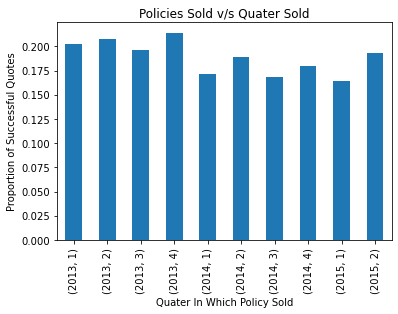

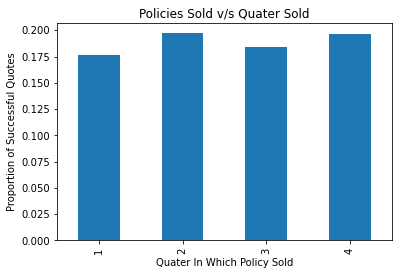

In [56]:
(data.groupby(['Original_Quote_Month'])['QuoteConversion_Flag'].sum()/data.groupby(['Original_Quote_Month'])['QuoteConversion_Flag'].count()).plot.bar()
plt.xlabel('Month In Which Policy Sold')
plt.ylabel('Proportion of Successful Quotes')
plt.title('Policies Sold v/s Month Sold')
plt.show()

(data.groupby(['Original_Quote_Year','Original_Quote_Quater'])['QuoteConversion_Flag'].sum()/data.groupby(['Original_Quote_Year','Original_Quote_Quater'])['QuoteConversion_Flag'].count()).plot.bar()
plt.xlabel('Quater In Which Policy Sold')
plt.ylabel('Proportion of Successful Quotes')
plt.title('Policies Sold v/s Quater Sold')
plt.show()

(data.groupby(['Original_Quote_Quater'])['QuoteConversion_Flag'].sum()/data.groupby(['Original_Quote_Quater'])['QuoteConversion_Flag'].count()).plot.bar()
plt.xlabel('Quater In Which Policy Sold')
plt.ylabel('Proportion of Successful Quotes')
plt.title('Policies Sold v/s Quater Sold')
plt.show()

<strong>OBSERVATIONS:</strong>
1. There is a decline in proportion of successful conversions with each passing year.
2. 2nd and 4th Quater i.e middle & fag end year months witness a rise in proportion of successful quotes in comparision to other two Quaters.

<h2>5. FEATURE ENGINEERING & SELECTION</h2>

<h3>HANDLING IMBALANCE IN DATASET</h3>

In [57]:
unsuccessful_count, successful_count = data['QuoteConversion_Flag'].value_counts()
df_successful = data[data['QuoteConversion_Flag'] == 1]
df_unsuccessful = data[data['QuoteConversion_Flag'] == 0]

In [58]:
df_successful.shape,df_unsuccessful.shape

((48894, 305), (211859, 305))

<strong>UNDERSAMPLING MAJORITY & UPSAMPLING MINORITY CLASS</strong>

In [59]:
unsuccessful_undersampled = df_unsuccessful.sample(2 * successful_count)
successful_upsampled = df_successful.sample(int(0.46 * unsuccessful_count), replace = True, ignore_index = True)
data = pd.concat([unsuccessful_undersampled, successful_upsampled], axis = 0)
data.shape

(195243, 305)

In [60]:
data['QuoteConversion_Flag'].value_counts()

0    97788
1    97455
Name: QuoteConversion_Flag, dtype: int64

In [61]:
data.head()

QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  Field7  \
46351         76982          2014-06-11                     0      E      23   
38529         64060          2015-01-08                     0      B      25   
35128         58443          2014-08-14                     0      B      25   
45313         75272          2015-05-06                     0      B       2   
245213       408586          2015-05-05                     0      F      22   

        Field8  Field9 Field10  Field11 Field12  CoverageField1A  \
46351   0.9392  0.0006   1,487   1.3045       N                8   
38529   0.9153  0.0007     935   1.0200       N                5   
35128   0.9153  0.0007     935   1.0200       N                8   
45313   0.9153  0.0007     935   1.0200       N               10   
245213  1.0101  0.0040     548   1.2694       N               24   

        CoverageField1B  CoverageField2A  CoverageField2B  CoverageField3A  \
46351                14                8               14                7   
38529                 6                5                6                7   
35128                14                8               14               11   
45313                18               11               18               14   
245213               25               24               25               21   

        CoverageField3B  CoverageField4A  CoverageField4B  CoverageField5A  \
46351                12                8               13               13   
38529                11                4                6               13   
35128                19                8               13               13   
45313                21               10               17               25   
245213               24               22               25               13   

        CoverageField5B  CoverageField6A  CoverageField6B CoverageField8  \
46351                22               13               23              T   
38529                22               13               23              Y   
35128                22               13               23              T   
45313                25               25               25              Y   
245213               22               13               23              Y   

       CoverageField9  CoverageField11A  CoverageField11B  SalesField1A  \
46351               F                 4                 6             2   
38529               E                11                21             2   
35128               J                 4                 6             5   
45313               E                 6                13             5   
245213              E                 3                 4            10   

        SalesField1B  SalesField2A  SalesField2B  SalesField3  SalesField4  \
46351              2             2             1            1            5   
38529              1             3             6            1            4   
35128             15             5            16            0            3   
45313             15             4            12            0            3   
245213            21             3            10            0            5   

        SalesField5  SalesField6 SalesField7  SalesField8  SalesField9  \
46351             5           11           T         6377            0   
38529             3           20           Q        13261            0   
35128             4           11           Q        42564            0   
45313             4           11           T        12738            0   
245213            5           11           P        38907            0   

        SalesField10  SalesField11  SalesField12  SalesField13  SalesField14  \
46351              0             0             0             0             0   
38529              0             0             0             0             0   
35128              1             1             1             0             0   
45313              0             0    

In [62]:
class_labels = data['QuoteConversion_Flag']
data.drop(columns = ['QuoteNumber','QuoteConversion_Flag','Original_Quote_Date'], axis = 1, inplace = True)

<h3>TRAIN & CV DATA SPLIT</h3>

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(data,class_labels,stratify=class_labels,test_size=0.20)
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((156194, 302), (39049, 302), (156194,), (39049,))

<h3>ENCODING THE CATEGORICAL FEATURES</h3>

In [65]:
def get_encoders(data):
    """This function takes dataframe as an input and identifies all the categorical variables and returns
    a one hot encoded feature corresponding to each one of them"""

    encoders_dict = {}
    for column in data.columns:
        if type(data[column].iloc[0]) == str:
            onehotencoder = OneHotEncoder(handle_unknown = 'ignore')
            encoders_dict[column] = onehotencoder
            onehotencoder.fit(data[column].values.reshape(-1,1))
    return encoders_dict

In [66]:
def encode_categorical_data(data, encoders_dict):
    encoded_data = []
    flag = 0
    for column, encoder in encoders_dict.items():
        if flag == 0:
            encoded_data = encoder.transform(data[column].values.reshape(-1,1)).toarray()
            flag = 1
        else:
            encoded_data = np.hstack((encoded_data,encoder.transform(data[column].values.reshape(-1,1)).toarray()))
    return encoded_data

In [67]:
encoders_dict = get_encoders(x_train)

In [68]:
encoded_categorical_data = encode_categorical_data(x_train,encoders_dict)
encoded_categorical_data_test = encode_categorical_data(x_cv,encoders_dict)

In [69]:
# categorical_columns, encoded_categorical_data , encoded_categorical_data_test= encode_categorical_data(x_train, x_cv)

In [70]:
x_train.drop(labels = list(encoders_dict.keys()), axis = 1 , inplace = True)
x_cv.drop(labels = list(encoders_dict.keys()), axis = 1 , inplace = True)

In [71]:
x_train = np.hstack((x_train.to_numpy(),encoded_categorical_data))
x_cv = np.hstack((x_cv.to_numpy(),encoded_categorical_data_test))

In [72]:
x_train.shape, y_train.shape, x_cv.shape, y_train.shape

((156194, 606), (156194,), (39049, 606), (156194,))

<strong>SAVING ONE HOT ENCODERS</strong>

In [73]:
f = open('encoders_dict.pkl','wb')
pickle.dump(encoders_dict,f)
f.close()

<h3>DROPPING CONSTANT FEATURES AND FEATURES WITH LOW VARIANCE</h3>

In [74]:
from sklearn.feature_selection import VarianceThreshold
vr = VarianceThreshold(threshold = 0.0)
vr.fit(x_train)

VarianceThreshold()

In [75]:
x_train = x_train[:,vr.get_support()]
x_cv = x_cv[:,vr.get_support()]
x_train.shape , x_cv.shape

((156194, 603), (39049, 603))

In [76]:
f = open('constant_features.pkl','wb')
pickle.dump(vr,f)
f.close()

<h3>STANDARDIZE DATASET</h3>

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_cv = scaler.transform(x_cv)

In [78]:
f = open('feature_scaling.pkl','wb')
pickle.dump(scaler,f)
f.close()

<h3>DATA VISUALIZATION : T-SNE</h3>

In [284]:
perplexity = [50,100,200]

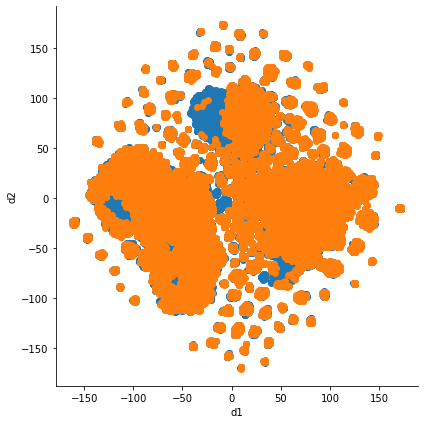

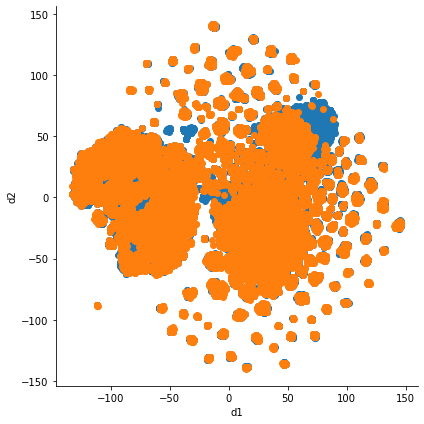

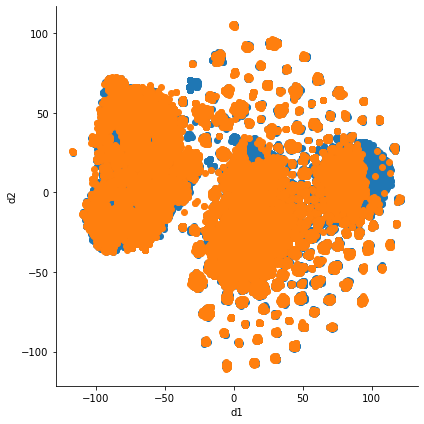

In [285]:
from sklearn.manifold import TSNE
import seaborn as sns
for p in perplexity:
    model = TSNE(n_components = 2, random_state = 0, n_iter = 2000, perplexity = p, learning_rate = 'auto',init = 'random')
    tsne_data = model.fit_transform(x_train)
    tsne_data = np.hstack((tsne_data,y_train.to_numpy().reshape(-1,1)))
    tsne_df = pd.DataFrame(data = tsne_data, columns =('d1','d2','label'))
    sns.FacetGrid(tsne_df,hue = 'label', height = 6).map(plt.scatter, 'd1','d2')
    plt.show()

<h2>MACHINE LEARNING MODELS</h2>

<h3>RANDOM FOREST CLASSIFIER</h3>

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators = 1000, max_depth=10, random_state=0, n_jobs = -1)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=0)

In [80]:
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba_cv  = clf.predict_proba(x_cv)
auc = roc_auc_score(y_train, y_pred_proba[:,1])
auc_cv = roc_auc_score(y_cv, y_pred_proba_cv[:,1])

<strong>ROC AUC SCORE</strong>

In [81]:
print('Train AUC = {auc}, CV AUC = {auc_cv}'.format(auc = auc,auc_cv = auc_cv))

Train AUC = 0.9463742742375456, CV AUC = 0.9415541105551879


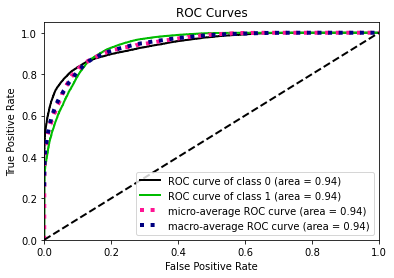

In [82]:
skplt.metrics.plot_roc(y_cv, y_pred_proba_cv)
plt.show()

<strong>TRAIN & CV LOG LOSS</strong>

In [83]:
from sklearn.metrics import log_loss
print('Train Log Loss = {}, CV Log Loss = {}'.format(log_loss(y_train,y_pred_proba), log_loss(y_cv,y_pred_proba_cv)))

Train Log Loss = 0.34767920499841987, CV Log Loss = 0.35524322553748683


<strong>CONFUSION MATRIX</strong>

<AxesSubplot:>

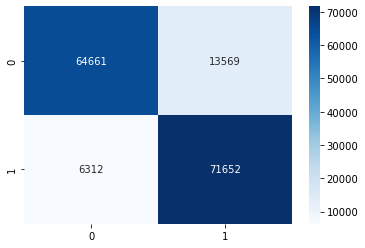

In [84]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, np.argmax(y_pred_proba, axis = -1)), annot=True,cmap='Blues', fmt='g')

<AxesSubplot:>

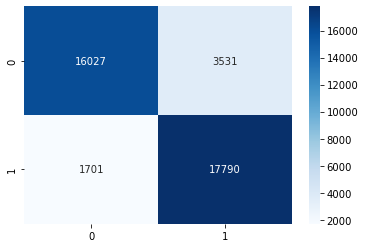

In [85]:
sns.heatmap(confusion_matrix(y_cv, np.argmax(y_pred_proba_cv, axis = -1)), annot=True,cmap='Blues', fmt='g')

<strong>F1_SCORE</strong>

In [86]:
from sklearn.metrics import f1_score
train_f1_score = f1_score(y_train, np.argmax(y_pred_proba, axis = -1))
cv_f1_score = f1_score(y_cv, np.argmax(y_pred_proba_cv, axis = -1))
print('Train F1_Score = {}, CV F1_Score = {}'.format(train_f1_score,cv_f1_score))

Train F1_Score = 0.8781689493519624, CV F1_Score = 0.8718024110555719


<h3>XGBOOST CLASSIFIER</h3>

In [87]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
x_cfl=XGBClassifier(n_estimators=1500, max_depth = 3, learning_rate = 0.03, colsample_bytree = 0.5, subsample = 1)
x_cfl.fit(x_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.5,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                            

In [88]:
y_pred_proba = c_cfl.predict_proba(x_train)
y_pred_proba_cv  = c_cfl.predict_proba(x_cv)
auc = roc_auc_score(y_train, y_pred_proba[:,1])
auc_cv = roc_auc_score(y_cv, y_pred_proba_cv[:,1])

<strong>ROC AUC SCORE</strong>

In [89]:
print('Train AUC = {auc}, CV AUC = {auc_cv}'.format(auc = auc,auc_cv = auc_cv))

Train AUC = 0.9688238956562764, CV AUC = 0.9658205919336132


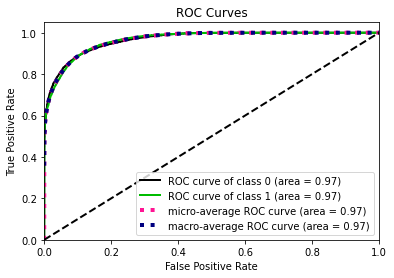

In [90]:
skplt.metrics.plot_roc(y_cv, y_pred_proba_cv)
plt.show()

<strong>TRAIN & CV LOG LOSS</strong>

In [91]:
from sklearn.metrics import log_loss
print('Train Log Loss = {}, CV Log Loss = {}'.format(log_loss(y_train,y_pred_proba), log_loss(y_cv,y_pred_proba_cv)))

Train Log Loss = 0.23931956411446156, CV Log Loss = 0.25061700294124206


<strong>CONFUSION MATRIX</strong>

<AxesSubplot:>

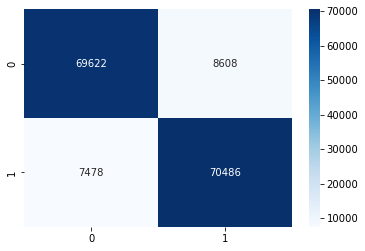

In [92]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, np.argmax(y_pred_proba, axis = -1)), annot=True,cmap='Blues', fmt='g')

<AxesSubplot:>

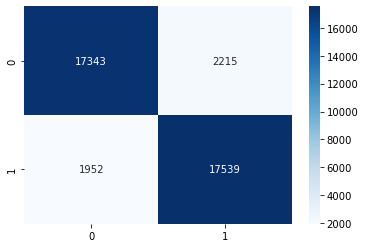

In [93]:
sns.heatmap(confusion_matrix(y_cv, np.argmax(y_pred_proba_cv, axis = -1)), annot=True,cmap='Blues', fmt='g')

<strong>F1_SCORE</strong>

In [94]:
from sklearn.metrics import f1_score
train_f1_score = f1_score(y_train, np.argmax(y_pred_proba, axis = -1))
cv_f1_score = f1_score(y_cv, np.argmax(y_pred_proba_cv, axis = -1))
print('Train F1_Score = {}, CV F1_Score = {}'.format(train_f1_score,cv_f1_score))

Train F1_Score = 0.8975792382431969, CV F1_Score = 0.893820868900497


<h3>INTRODUCING FEATURE INTERACTIONS</h3>

In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

def imp_features(data, keep, labels):
    '''
    Collect important features using Random Forest Classifier
    '''
    rf = RandomForestClassifier(n_estimators = 1000,max_depth = 10, n_jobs = -1)
    rf.fit(data, labels)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    return imp_feature_indx[:keep]

In [96]:
indexes = imp_features(x_train, 50, y_train)

In [97]:
x_train[:,indexes].shape

(156194, 50)

In [98]:
def introduce_feature_interactions(data, columns):
    """This function randomly picks three features from the list of features provided to it
    and performs various feature interactions on them to generate a set of new features"""
    new_features = []
    
    for features in columns:
        
        feature_1 = data[:,features[0]]
        feature_2 = data[:,features[1]]
        feature_3 = data[:,features[2]]

        new_features.append(feature_1 * feature_2)
        new_features.append(feature_1 + feature_2)
        new_features.append(feature_1 - feature_2)
        new_features.append(feature_1 * feature_2 + feature_3)
        new_features.append(feature_1 + feature_2 - feature_3)
        new_features.append(feature_1 - feature_2 * feature_3)
        
        
    new_features = np.array(new_features)
    return new_features.T

In [99]:
columns = []
for i in range(0,100):
    columns.append(np.random.choice(indexes, size=3, replace=False))

In [100]:
new_features =  introduce_feature_interactions(x_train,columns)
new_features_cv = introduce_feature_interactions(x_cv,columns)
new_features.shape, new_features_cv.shape 

((156194, 600), (39049, 600))

In [101]:
x_train = np.hstack((x_train,new_features))
x_cv = np.hstack((x_cv,new_features_cv))
x_train.shape, x_cv.shape

((156194, 1203), (39049, 1203))

In [102]:
f = open('feature_interactions.pkl','wb')
pickle.dump(columns,f)
f.close()

<h3>DROPPING HIGHLY CORRELATED FEATURES</h3>

In [103]:
dataset = pd.DataFrame(x_train)

In [104]:
def correlation(dataset, threshold):
    column = set()
    cd = dataset.corr()
    for i in range(len(cd.columns)):
        for j in range(i):
            if abs(cd.iloc[i,j]) >threshold:
                col_name = cd.columns[i]
                column.add(col_name)
    return column

In [105]:
correlated_features = list(correlation(dataset,0.99))

In [106]:
final_features = [feature for feature in dataset.columns if feature not in correlated_features]

In [107]:
x_train = x_train[:,final_features]
x_cv = x_cv[:,final_features]
x_train.shape , x_cv.shape

((156194, 1146), (39049, 1146))

In [108]:
f = open('final_features.pkl','wb')
pickle.dump(final_features,f)
f.close()

<h3>RANDOM FOREST CLASSIFIER WITH FEATURE INTERACTIONS</h3>

In [109]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000, max_depth=10, random_state=0, n_jobs = -1)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=0)

In [110]:
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba_cv  = clf.predict_proba(x_cv)
auc = roc_auc_score(y_train, y_pred_proba[:,1])
auc_cv = roc_auc_score(y_cv, y_pred_proba_cv[:,1])

<strong>ROC AUC SCORE</strong>

In [111]:
print('Train AUC = {auc}, CV AUC = {auc_cv}'.format(auc = auc,auc_cv = auc_cv))

Train AUC = 0.9601581853958523, CV AUC = 0.9563737386451443


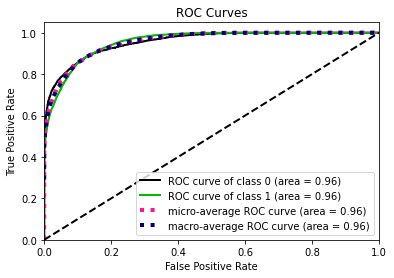

In [112]:
skplt.metrics.plot_roc(y_cv, y_pred_proba_cv)
plt.show()

<strong>TRAIN & CV LOG LOSS</strong>

In [113]:
from sklearn.metrics import log_loss
print('Train Log Loss = {}, CV Log Loss = {}'.format(log_loss(y_train,y_pred_proba), log_loss(y_cv,y_pred_proba_cv)))

Train Log Loss = 0.2593797983885249, CV Log Loss = 0.268504114714604


<strong>CONFUSION MATRIX</strong>

<AxesSubplot:>

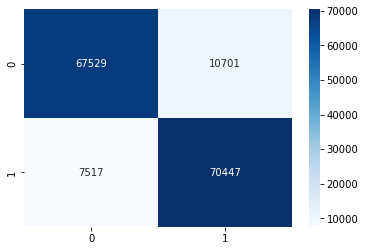

In [114]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, np.argmax(y_pred_proba, axis = -1)), annot=True,cmap='Blues', fmt='g')

<AxesSubplot:>

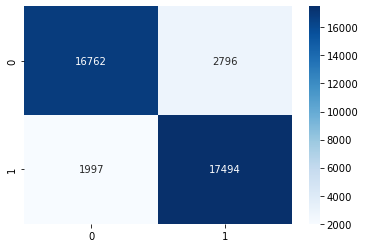

In [115]:
sns.heatmap(confusion_matrix(y_cv, np.argmax(y_pred_proba_cv, axis = -1)), annot=True,cmap='Blues', fmt='g')

<strong>F1_SCORE</strong>

In [116]:
from sklearn.metrics import f1_score
train_f1_score = f1_score(y_train, np.argmax(y_pred_proba, axis = -1))
cv_f1_score = f1_score(y_cv, np.argmax(y_pred_proba_cv, axis = -1))
print('Train F1_Score = {}, CV F1_Score = {}'.format(train_f1_score,cv_f1_score))

Train F1_Score = 0.8855020363014732, CV F1_Score = 0.8795153465222091


<h3>XGBOOST CLASSIFIER WITH FEATURE INTERACTIONS</h3>

<strong>HYPERPARAMETER TUNING</strong>

In [117]:
from sklearn.model_selection import RandomizedSearchCV
x_cfl=XGBClassifier()
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[200,500,1500],
     'max_depth':[3,5],
    'colsample_bytree':[0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams, n_iter = 4)
random_cfl1.fit(x_train,y_train)
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 1500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.3}


<strong>MODEL WITH BEST HYPERPARAMETERS</strong>

In [127]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
x_cfl=XGBClassifier(n_estimators=1500, max_depth = 5, learning_rate = 0.05, colsample_bytree = 0.3, subsample = 0.5)
x_cfl.fit(x_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.3,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                            

In [128]:
y_pred_proba = c_cfl.predict_proba(x_train)
y_pred_proba_cv  = c_cfl.predict_proba(x_cv)
auc = roc_auc_score(y_train, y_pred_proba[:,1])
auc_cv = roc_auc_score(y_cv, y_pred_proba_cv[:,1])

<strong>ROC AUC SCORE</strong>

In [129]:
print('Train AUC = {auc}, CV AUC = {auc_cv}'.format(auc = auc,auc_cv = auc_cv))

Train AUC = 0.9936127243373905, CV AUC = 0.9790056519146504


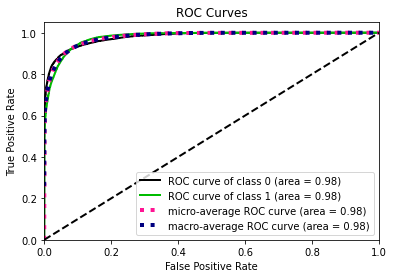

In [130]:
skplt.metrics.plot_roc(y_cv, y_pred_proba_cv)
plt.show()

<strong>TRAIN & CV LOG LOSS</strong>

In [131]:
from sklearn.metrics import log_loss
print('Train Log Loss = {}, CV Log Loss = {}'.format(log_loss(y_train,y_pred_proba), log_loss(y_cv,y_pred_proba_cv)))

Train Log Loss = 0.12016930618142911, CV Log Loss = 0.19465866768431764


<strong>CONFUSION MATRIX</strong>

<AxesSubplot:>

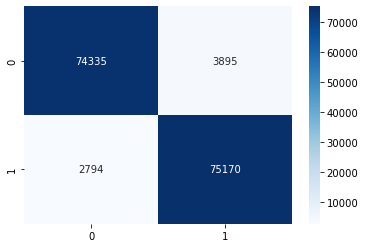

In [132]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, np.argmax(y_pred_proba, axis = -1)), annot=True,cmap='Blues', fmt='g')

<AxesSubplot:>

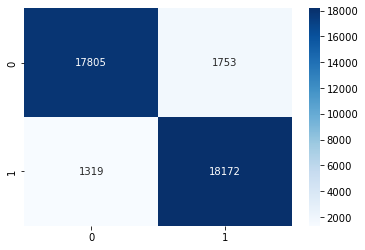

In [133]:
sns.heatmap(confusion_matrix(y_cv, np.argmax(y_pred_proba_cv, axis = -1)), annot=True,cmap='Blues', fmt='g')

<strong>F1_SCORE</strong>

In [134]:
from sklearn.metrics import f1_score
train_f1_score = f1_score(y_train, np.argmax(y_pred_proba, axis = -1))
cv_f1_score = f1_score(y_cv, np.argmax(y_pred_proba_cv, axis = -1))
print('Train F1_Score = {}, CV F1_Score = {}'.format(train_f1_score,cv_f1_score))

Train F1_Score = 0.9574027727362461, CV F1_Score = 0.9220621067586767


<h3>SAVING BEST MODEL</h3>

In [136]:
f = open('best_model_xgboost.pkl','wb')
pickle.dump(x_cfl,f)
f.close()

In [137]:
f = open('best_model_cc.pkl','wb')
pickle.dump(c_cfl,f)
f.close()

In [3]:
from prettytable import PrettyTable

results = PrettyTable(["MODEL", "CV ROC AUC SCORE", "CV LOG LOSS", "CV F1_Score"])
  
results.add_row(["RANDOM FOREST", "0.9415541105551879", "0.35524322553748683", "0.8718024110555719"])
results.add_row(["XGBOOST", "0.9658205919336132", "0.25061700294124206", "0.893820868900497"])
results.add_row(["RANDOM FOREST + FEATURE INTERACTIONS", "0.9563737386451443", "0.268504114714604", "0.8795153465222091"])
results.add_row(["XGBOOST + FEATURE INTERACTIONS", "0.9790056519146504", "0.19465866768431764", "0.9220621067586767"])
  
print(results)

+--------------------------------------+--------------------+---------------------+--------------------+
|                MODEL                 |  CV ROC AUC SCORE  |     CV LOG LOSS     |    CV F1_Score     |
+--------------------------------------+--------------------+---------------------+--------------------+
|            RANDOM FOREST             | 0.9415541105551879 | 0.35524322553748683 | 0.8718024110555719 |
|               XGBOOST                | 0.9658205919336132 | 0.25061700294124206 | 0.893820868900497  |
| RANDOM FOREST + FEATURE INTERACTIONS | 0.9563737386451443 |  0.268504114714604  | 0.8795153465222091 |
|    XGBOOST + FEATURE INTERACTIONS    | 0.9790056519146504 | 0.19465866768431764 | 0.9220621067586767 |
+--------------------------------------+--------------------+---------------------+--------------------+
